In [30]:
from flair.data import Dictionary, Corpus
from flair.models import LanguageModel
from flair.trainers.language_model_trainer import LanguageModelTrainer, TextCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, FlairEmbeddings
import flair
import numpy as np
import pandas as pd
import chardet
from flair.data import Sentence
import os, shutil
import torch
from flair.datasets import UD_ENGLISH
import matplotlib.pyplot as plt


**The training is actually run in command lines. The training process keep printing information, which exceed the limit of notebook.**

# preprocessing

In [28]:
df = pd.read_csv('dataset/Spooky Author Identification/split/total_with_pos.csv',index_col=0)
df

,id,text,author,flair POS,nltk POS,hmm POS,flair raw,nltk raw,hmm raw,flair_freq,nltk_freq,hmm_freq
0,id26305,"This process, however, afforded me no means of...",EAP,"['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...","['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...","['DT', 'JJ', 'NN', 'IN', 'PRP', 'DT', 'NNS', '...","This <DT> process <NN> , <,> however <RB> , <,...","[('This', 'DT'), ('process', 'NN'), (',', ',')...","[('This', 'DT'), ('process,', 'JJ'), ('however...","[0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 1.0, 4.0, 0.0, ...","[0.0, 3.0, 0.0, 2.0, 2.0, 4.0, 1.0, 0.0, 0.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"['PRP', 'RB', 'RB', 'VBD', 'IN', 'PRP', 'IN', ...","['PRP', 'RB', 'RB', 'VBD', 'TO', 'PRP', 'IN', ...","['PRP', 'RB', 'RB', 'VBN', 'IN', 'PRP', 'IN', ...",It <PRP> never <RB> once <RB> occurred <VBD> t...,"[('It', 'PRP'), ('never', 'RB'), ('once', 'RB'...","[('It', 'PRP'), ('never', 'RB'), ('once', 'RB'...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'JJ', ...","['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'JJ', ...","['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'NN', ...",In <IN> his <PRP$> left <JJ> hand <NN> was <VB...,"[('In', 'IN'), ('his', 'PRP$'), ('left', 'JJ')...","[('In', 'IN'), ('his', 'PRP$'), ('left', 'JJ')...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"['WRB', 'JJ', 'VBZ', 'NN', 'IN', 'PRP', 'VBD',...","['WRB', 'RB', 'VBZ', 'JJ', 'IN', 'PRP', 'VBD',...","['WRB', 'JJ', 'VBZ', 'NN', 'IN', 'PRP', 'VBD',...",How <WRB> lovely <JJ> is <VBZ> spring <NN> As ...,"[('How', 'WRB'), ('lovely', 'RB'), ('is', 'VBZ...","[('How', 'WRB'), ('lovely', 'JJ'), ('is', 'VBZ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 3.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 5.0, 3.0, 0.0, 0.0, 1.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"['VBG', 'NN', 'RB', ',', 'RB', 'RB', 'NN', ','...","['VBG', 'NN', 'RB', ',', 'RB', 'RB', 'NN', ','...","['VBG', 'NN', 'VBZ', 'RB', 'RB', 'IN', 'DT', '...","Finding <VBG> nothing <NN> else <RB> , <,> not...","[('Finding', 'VBG'), ('nothing', 'NN'), ('else...","[('Finding', 'VBG'), ('nothing', 'NN'), ('else...","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 2.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"['PRP', 'MD', 'VB', 'VBN', ',', 'IN', 'PRP', '...","['PRP', 'MD', 'VB', 'VBN', ',', 'IN', 'PRP', '...","['PRP', 'MD', 'VB', 'VBN', 'IN', 'PRP', 'VBD',...","I <PRP> could <MD> have <VB> fancied <VBN> , <...","[('I', 'PRP'), ('could', 'MD'), ('have', 'VB')...","[('I', 'PRP'), ('could', 'MD'), ('have', 'VB')...","[0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, ...","[0.0, 4.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"['DT', 'NNS', 'VBD', 'PRP', 'RB', 'IN', 'IN', ...","['DT', 'NNS', 'VBD', 'PRP', 'RB', 'IN', 'IN', ...","['DT', 'NN', 'IN', 'PRP', 'RB', 'RB', 'IN', 'I...",The <DT> lids <NNS> clenched <VBD> themselves ...,"[('The', 'DT'), ('lids', 'NNS'), ('clenched', ...","[('The', 'DT'), ('lids', 'NN'), ('clenched', '...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"['FW', 'FW', 'FW', 'FW', 'DT', 'VBZ', 'TO', '

In [66]:
flair_pos = df['flair POS'].values.tolist()

for i in range(len(df)):
    flair_pos[i] = eval(flair_pos[i])
    if i % 500 == 0:
        if i != 0:
            f.close()
        filecounts = int(i/500)
        f = open('dataset/spooky plain pos/raw/'+str(filecounts)+ '.txt', 'w')
    pos_seq = flair_pos[i]
    pos_sentence = ' '.join(pos_seq)    
    f.write(pos_sentence + '\n')

In [67]:
filenames = np.array(os.listdir('dataset/spooky plain pos/raw/'))
separate_idx = np.random.choice(len(filenames), len(filenames))
dev_set = filenames[separate_idx[:5]]
test_set = filenames[separate_idx[5:10]]
train_set = filenames[separate_idx[10:]]

In [69]:
with open('dataset/spooky plain pos/valid.txt', 'w') as f_write:
    for filename in dev_set:
        with open('dataset/spooky plain pos/raw/'+filename, 'r') as f_read:
            f_write.writelines(f_read.readlines())

with open('dataset/spooky plain pos/test.txt', 'w') as f_write:
    for filename in test_set:
        with open('dataset/spooky plain pos/raw/'+filename, 'r') as f_read:
            f_write.writelines(f_read.readlines())

In [71]:
count = 1
for filename in train_set:
    shutil.copyfile('dataset/spooky plain pos/raw/'+filename, 'dataset/spooky plain pos/train/train_split_'+str(count))   
    count += 1

# training POS LM

In [2]:
corpus: Corpus = UD_ENGLISH().downsample(0.1)

tag_type = 'pos'

dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(dictionary)

2020-11-05 19:24:24,092 Reading data from /home/joey/.flair/datasets/ud_english
2020-11-05 19:24:24,093 Train: /home/joey/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2020-11-05 19:24:24,093 Dev: /home/joey/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2020-11-05 19:24:24,094 Test: /home/joey/.flair/datasets/ud_english/en_ewt-ud-test.conllu
Dictionary with 53 tags: <unk>, O, -LRB-, DT, VBZ, RB, JJ, NN, ,, CC, NNS, VBP, VBN, IN, VBG, PRP, RBR, NNP, CD, ., -RRB-, MD, VB, WP, VBD, HYPH, NNPS, RBS, EX, TO


In [7]:
corpus = TextCorpus('dataset/spooky plain pos/', dictionary = dictionary, character_level=False)

is_forward_lm = True

In [6]:
# instantiate your language model, set hidden size and number of layers
language_model = LanguageModel(dictionary,
                               is_forward_lm,
                               hidden_size=512,
                               nlayers=1)

# train your language model
trainer = LanguageModelTrainer(language_model, corpus)

trainer.train('model/language_model/pos_lm',
              sequence_length=100,
              mini_batch_size=50,
              max_epochs=100)

2020-11-05 19:24:49,860 read text file with 500 lines
2020-11-05 19:24:49,861 read text file with 500 lines
2020-11-05 19:24:49,862 shuffled
2020-11-05 19:24:49,863 shuffled
2020-11-05 19:24:49,925 read text file with 500 lines
2020-11-05 19:24:49,926 shuffled
2020-11-05 19:24:49,937 read text file with 500 lines
2020-11-05 19:24:49,938 shuffled
2020-11-05 19:24:50,001 Sequence length is 100
2020-11-05 19:24:50,001 read text file with 500 lines
2020-11-05 19:24:50,002 Split 1	 - (19:24:50)
2020-11-05 19:24:50,002 shuffled
2020-11-05 19:24:50,083 0 seconds for train split 1
2020-11-05 19:24:50,167 best loss so far 10000.00
2020-11-05 19:24:50,667 ("\nRBS,JJWPNNDTVBZJJDTGW,NNRB:NNCCTOJJOJJRBPRPPRP$RBNNVBDNNVBPPRPRBVBDLSDTPRPNN-RRB-VBRBNNPRP$DTDTRBRB-LRB-PRP$DTNNNNDTWRBMDNNVBNNN.,PRPDT.NNVBDNNSNNS''CCUHVBNJJSNN-LRB-NN,NNDTWDTDTJJSRBRNNPOSDTVBPJJ,POSRB``JJNNPRP,,DTJJNN.NNPRPPDTPRPFWNNNNMDDTDT,VBZ.NNJJ,RBVBDWRBNNNNPDTVBDNNDTDTJJNNVBZVBNNNRP,PRP$NNDTDTDTJJNN<START>JJ:WRB.JJ,NN,CCADD$,JJHYPH,

2020-11-05 19:24:51,940 -----------------------------------------------------------------------------------------
2020-11-05 19:24:51,940 | end of split   3 / 30 | epoch   1 | time:  0.61s | valid loss  3.39 | valid ppl    29.74 | learning rate 20.0000
2020-11-05 19:24:51,940 -----------------------------------------------------------------------------------------
2020-11-05 19:24:51,941 Sequence length is 100
2020-11-05 19:24:51,941 read text file with 500 lines
2020-11-05 19:24:51,942 Split 4	 - (19:24:51)
2020-11-05 19:24:51,942 shuffled
2020-11-05 19:24:51,990 0 seconds for train split 4
2020-11-05 19:24:52,064 best loss so far  3.25
2020-11-05 19:24:52,554 ("\nNNDTNNINCDNNNNNNCDNNVBPNNDTNN,PRPJJNN,NNVBPNNNNNNNNNNNNNNVBDRBNNNNNNPNNJJCCINCCNNNNTONNCCNNNNNN$NNINPDTNNNNNNNNRBINNNPRPCCNNINNNVBDINNNNN,NNNNININJJNNVBDINPRP$NN.CCNNRBNNIN-RRB-NNNNVBDTNNNNNNVB.NNNN,INNNNNININNNNNNNINDTNNNNCCDTNNNNNNINNNINNNINDTNN.NNININNNNNINNNNNSRPNNNNSNNNN,,PRP$NNINPRP$NNNNINNNONNPRPNNIN:NN.DTNNPRP$HYPHNN

2020-11-05 19:24:53,813 -----------------------------------------------------------------------------------------
2020-11-05 19:24:53,814 | end of split   6 / 30 | epoch   1 | time:  0.62s | valid loss  3.08 | valid ppl    21.69 | learning rate 20.0000
2020-11-05 19:24:53,814 -----------------------------------------------------------------------------------------
2020-11-05 19:24:53,815 Sequence length is 100
2020-11-05 19:24:53,816 Split 7	 - (19:24:53)
2020-11-05 19:24:53,816 read text file with 500 lines
2020-11-05 19:24:53,817 shuffled
2020-11-05 19:24:53,863 0 seconds for train split 7
2020-11-05 19:24:53,937 best loss so far  3.06
2020-11-05 19:24:54,426 ("\n.INVBDVBPRPVBJJNNSWRBVBDVBDVBDNNVBDRBVBNINVB,RBPRPVBDNNSVBDPRP$INNNSINPRP$JJINPRPVBDPRPVBDVBDNNSVBDRBVBDTONNVBDINPRPVBD,CCPRP$,NNNNSVBZVBDDTJJNNSINVBGINPRPVBZVBDINJJJJNNSVBNJJJJNNSVBDVBDPRPVBDPRPVBDVBDPRP$JJNNINPRPVBDADDJJRBR.CCVBRBINPRPINPRPVBDINJJJJJJNNSVBDPRP$JJINNNSVBDJJNNSPRPVBDVBVBDVBNVB.VBDPDTPRPVBDVBJJWP$ININJJNNS,VB

2020-11-05 19:24:55,056 -----------------------------------------------------------------------------------------
2020-11-05 19:24:55,057 | end of split   8 / 30 | epoch   1 | time:  0.63s | valid loss  2.87 | valid ppl    17.60 | learning rate 20.0000
2020-11-05 19:24:55,058 -----------------------------------------------------------------------------------------
2020-11-05 19:24:55,059 Sequence length is 100
2020-11-05 19:24:55,060 Split 9	 - (19:24:55)
2020-11-05 19:24:55,059 read text file with 500 lines
2020-11-05 19:24:55,060 shuffled
2020-11-05 19:24:55,109 0 seconds for train split 9
2020-11-05 19:24:55,188 best loss so far  2.87
2020-11-05 19:24:55,676 ("\nCDPRP,CCVBZPRP.VBP,PRP$NNSCCNNPJJVBGDTNN.DTNNSPRPMDMDINDTNNVBZ<START>CCPRP,DTJJJJJJNNSVBP.JJJJVBNJJNNDTNNS.CCJJNNSPRP,DTJJSINDTNNS.PRP$NNSNNADDRBNNVBDPRP$NN.PRP.PRP.VBZNN.VBN.PRP.PRP.PRP.PRP$NNVBDPRPMD.PRP$NNS.DTNNNNS.PRPVBPRB:PRP.PRPPRP,RBPRP,JJNNS,PRPVBPPRP.PRP$JJJJNNS.''INDTNNMD,JJ,CCNNS.PRP.NFPNN.RBNNPNNPJJINPRPSYM,CCDTN

2020-11-05 19:24:56,950 -----------------------------------------------------------------------------------------
2020-11-05 19:24:56,951 | end of split  11 / 30 | epoch   1 | time:  0.65s | valid loss  2.80 | valid ppl    16.43 | learning rate 20.0000
2020-11-05 19:24:56,951 -----------------------------------------------------------------------------------------
2020-11-05 19:24:56,952 Sequence length is 100
2020-11-05 19:24:56,953 Split 12	 - (19:24:56)
2020-11-05 19:24:56,953 read text file with 500 lines
2020-11-05 19:24:56,954 shuffled
2020-11-05 19:24:57,006 0 seconds for train split 12
2020-11-05 19:24:57,095 best loss so far  2.80
2020-11-05 19:24:57,594 ("\nRB.INNNININRBCCVB''CDNN,ININPRPVBDINWP$INNNINNNININCCINPRPVBDRBININININNNCC-RRB-CCNNININPRP$NNVBDPRPPRP$PRP$NNINPRP$NNINVBNDTNN.ININPRPMDVBDINPRPPRPVBDRBRBWRBININNNINNNPINPRPVBDININNNVBGCCRBRB.VBNRBCC``JJINNNWDTVBDDTNNINRBRBJJNNNFPININNNINRBJJNNINNN.,CCPRPININNNINJJ,INNN,INVBGNNSLS,CC,RBINNN:INPRPVBDNNINPRP$NNINVBGNN.INDTJ

2020-11-05 19:24:59,069 -----------------------------------------------------------------------------------------
2020-11-05 19:24:59,069 | end of split  14 / 30 | epoch   1 | time:  0.76s | valid loss  2.73 | valid ppl    15.27 | learning rate 20.0000
2020-11-05 19:24:59,070 -----------------------------------------------------------------------------------------
2020-11-05 19:24:59,071 Sequence length is 100
2020-11-05 19:24:59,072 Split 15	 - (19:24:59)
2020-11-05 19:24:59,072 read text file with 500 lines
2020-11-05 19:24:59,073 shuffled
2020-11-05 19:24:59,133 0 seconds for train split 15
2020-11-05 19:24:59,228 best loss so far  2.73
2020-11-05 19:24:59,757 ("\n.RBWPVBN,PRPVBDRBVBNVBZCCPRPVBDVBNRB``PDTINNNPJJWRBTOVBVBNVBDDTNNSVBDVBN,:VBZVBDVBNRBPRPVBDVBNVBNWRBVBNRB,RBVBDVBNRBJJSRBNNSVB,VBGJJVBDRBRBVBRB.NN.RBVBRBVBDINWP.VBDRBVBDRBNNVBDRBRBRBRBNNVBDDTRBTOVB,NNPRBSVBGRBJJNN.CCVBDRBJJCCINDTNN.CCVBPDTTOVBRBVBRBVBDVB,TOVBRBVBDPRP:PRPVBDVBPRPMDVBNNS.VBDVBN``DTNNSMDVB,VBDRBRBVBRBVBN,:RBR

2020-11-05 19:25:01,132 -----------------------------------------------------------------------------------------
2020-11-05 19:25:01,133 | end of split  17 / 30 | epoch   1 | time:  0.67s | valid loss  2.53 | valid ppl    12.60 | learning rate 20.0000
2020-11-05 19:25:01,134 -----------------------------------------------------------------------------------------
2020-11-05 19:25:01,135 Sequence length is 100
2020-11-05 19:25:01,135 Split 18	 - (19:25:01)
2020-11-05 19:25:01,135 read text file with 500 lines
2020-11-05 19:25:01,137 shuffled
2020-11-05 19:25:01,197 0 seconds for train split 18
2020-11-05 19:25:01,283 best loss so far  2.53
2020-11-05 19:25:01,804 ("\nDTNNVBDNNRBRBINDTNNINVBGDTNN.INDTNNINDTNNMDVBVBNDTNNVBDJJNNINDTJJNNTOVBJJNN:PRPINJJNNININDTNNINJJJJNNINRBJJNNVBNNNINPRPNNPRPDTNNWDTVBCCNNINDTNNPRPVBDPRPPRPMDVBTOVBINDTNNINDTNNVBNINNNRBINVBNINDTNNWRBPRPVBDVBGDTNNNNINDTNN.INDTNNINDTNN.INDTNNNNINDTNNNNCDCCDTJJNNNNINDTNNINNNP``NNP:WDTWDTNNPINNNPNNSCC:NN:INDTNNINPRPMDTOVBINDTNN

2020-11-05 19:25:03,197 -----------------------------------------------------------------------------------------
2020-11-05 19:25:03,197 | end of split  20 / 30 | epoch   1 | time:  0.72s | valid loss  2.58 | valid ppl    13.24 | learning rate 20.0000
2020-11-05 19:25:03,197 -----------------------------------------------------------------------------------------
2020-11-05 19:25:03,199 Sequence length is 100
2020-11-05 19:25:03,200 Split 21	 - (19:25:03)
2020-11-05 19:25:03,200 read text file with 500 lines
2020-11-05 19:25:03,201 shuffled
2020-11-05 19:25:03,252 0 seconds for train split 21
2020-11-05 19:25:03,343 best loss so far  2.52
2020-11-05 19:25:03,886 ("\nINDTNNINNNPINDTNNP``RBRBRNNDTNNINDTNN''DTNNRBVBPRPINPRP$NN,CD''RBDTNNINDTNNINNN,RBPRPINDTNN.``DTNN,PRPINDTVBN,CCPRPINWP$NNCCDTNNCCINDTPRPVBDVBNDTVBGINDTNNINDTNNS-LRB-PRP$NNNNRBNN''VBZPRPTOVBNNWRBDTJJNNCCNNVBGVBZVBNINDTNN,,CCINDTNNINPRP$NNVBDPRPRBDTNNDTNNRBRBTOVBNNINDTDTNNNNDTNN,INCCINPRP$NN.DTNNVBZDTNNPRPINPRP$NNSINPRP$NNN

2020-11-05 19:25:05,179 -----------------------------------------------------------------------------------------
2020-11-05 19:25:05,180 | end of split  23 / 30 | epoch   1 | time:  0.64s | valid loss  2.67 | valid ppl    14.44 | learning rate 20.0000
2020-11-05 19:25:05,180 -----------------------------------------------------------------------------------------
2020-11-05 19:25:05,181 Sequence length is 100
2020-11-05 19:25:05,182 Split 24	 - (19:25:05)
2020-11-05 19:25:05,181 read text file with 500 lines
2020-11-05 19:25:05,182 shuffled
2020-11-05 19:25:05,234 0 seconds for train split 24
2020-11-05 19:25:05,325 best loss so far  2.46
2020-11-05 19:25:05,810 ("\n<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>VBDPRP$EXVBDDTNNINNNINPRPMDVBINPRPVBINDTNNINNNSINPRPVBDCCNNINPRPVBDINNNINNNNNPSPRP$NNWP''MDVBDTNNINWP$NNMDRBVBPRPVBPINDTNNINDTNNINNN.NN,INNNSINVBZNNINPRP$NNCCNNNNINNNPRPVBDJJNNVBGDTJJNNPOSNNIN,CCINDTNNINNNWDTPRPVBZININPRPPRPVBDIN

2020-11-05 19:25:07,097 -----------------------------------------------------------------------------------------
2020-11-05 19:25:07,098 | end of split  26 / 30 | epoch   1 | time:  0.63s | valid loss  2.49 | valid ppl    12.08 | learning rate 20.0000
2020-11-05 19:25:07,098 -----------------------------------------------------------------------------------------
2020-11-05 19:25:07,099 Sequence length is 100
2020-11-05 19:25:07,100 Split 27	 - (19:25:07)
2020-11-05 19:25:07,156 0 seconds for train split 27
2020-11-05 19:25:07,241 best loss so far  2.43
2020-11-05 19:25:07,712 ("\n<unk>INDTGWCCJJNNSINDTJJINDTJJDTINDTJJNNSCCPRP,CCINDTJJNNINDTJJJJNNWDTMDVBINNNDTJJ,JJTOVBDTJJINDTJJNNDTJJINDTJJNNS,DTPRPVBZNNCDNNINDTJJNNSINPRPVBZJJDTJJINJJNNS,NNP,CCNNPDTNNPVBZDTJJNNRBJJDTJJRNNCDJJJJINJJNNINDTJJNN:DTJJNNSRBDTJJCCDTJJNNPRPDTJJJJNNCCVBNVBNVBNDTJJNNINPRP$JJNNS.DTRBJJJJCCJJINJJ.PRP$JJNNSVBNDTVBNJJJJJJNNSINDTDTJJVBPJJINDTJJPRPVBPDTJJINJJNNNNSINDTJJNNINNNSRBINJJNNSINDTINDTJJNNSCCDTJJNNS$VBPJJCCIN

2020-11-05 19:25:08,986 -----------------------------------------------------------------------------------------
2020-11-05 19:25:08,986 | end of split  29 / 30 | epoch   1 | time:  0.65s | valid loss  2.67 | valid ppl    14.37 | learning rate 20.0000
2020-11-05 19:25:08,987 -----------------------------------------------------------------------------------------
2020-11-05 19:25:08,988 Sequence length is 100
2020-11-05 19:25:08,988 Split 30	 - (19:25:08)
2020-11-05 19:25:09,040 0 seconds for train split 30
2020-11-05 19:25:09,135 best loss so far  2.39
2020-11-05 19:25:09,628 ("\n,.PRP,INDTJJNNSPRP.DTNNINPRP$NNS.PRPINDTNNSRPRBDTJJ,``DTNNS``PRPRBRBPRP.INPRPVBDPRP.DTJJDTJJNNSININDTJJ,DTJJNNSVBNININPRPINNNS.PRP.DTNNSRBRBPRPINDTJJNNS.RBINDTCD,CCVBN''.PRPRBRBTOVB,DTNNSCCDTJJ,CCINPRPPRPVBPNNINDTNNS.PRPVBPPRPINDTJJNNSINDTNNS,JJ,CDNNS<START>DTJJJJSJJNN,DTNNSINDT:PRP,CCPRPVBZVBPRPPRPINNNP,PRPMDRBVB,INDTNNSVBDNNSINDTNNINJJNNS,CCDTJJNNSVBG.PRPVBDRBCCNNP.NNP,RBRB,CCDTNNSCCPRPVBRBVBDTJJINJJNNINDT

2020-11-05 19:25:11,120 -----------------------------------------------------------------------------------------
2020-11-05 19:25:11,120 | end of split   2 / 30 | epoch   2 | time:  0.61s | valid loss  2.53 | valid ppl    12.54 | learning rate 20.0000
2020-11-05 19:25:11,120 -----------------------------------------------------------------------------------------
2020-11-05 19:25:11,122 Sequence length is 100
2020-11-05 19:25:11,122 Split 3	 - (19:25:11)
2020-11-05 19:25:11,122 read text file with 500 lines
2020-11-05 19:25:11,123 shuffled
2020-11-05 19:25:11,179 0 seconds for train split 3
2020-11-05 19:25:11,262 best loss so far  2.38
2020-11-05 19:25:11,745 ("\n<unk>,PRPVBDRBRBVBDRBVBNVBGNNS,RBVBDTOVBPRPVBTOVBRBVBN,PRPVBDRBRBPRPVBDRBRBVBDPRPRBRBRBVBDRBRBRBRBRBVBDDTNNNNPSCCJJNN,PRPVBDVBNNNTOVBPRPNNVBDDTNNVBDPRPJJRBRBRBVBN,PRPVBDRBRBVBDPRPVBDRBRBRBVBDRBPRPVBDRBNN.PRPVBDCDNN,PRPVBDVBNPDTNN''PRPVBPPRP$NNNN:RBVBDVBNRBRBRB.PRPVBDRBVBDCDNNCCDTNN.PRPVBDPRPVBDDTRBJJNN,PRP$NN,NNVBDRBRBRBRBRB

2020-11-05 19:25:13,041 -----------------------------------------------------------------------------------------
2020-11-05 19:25:13,041 | end of split   5 / 30 | epoch   2 | time:  0.65s | valid loss  2.52 | valid ppl    12.41 | learning rate 20.0000
2020-11-05 19:25:13,041 -----------------------------------------------------------------------------------------
2020-11-05 19:25:13,042 Sequence length is 100
2020-11-05 19:25:13,043 Split 6	 - (19:25:13)
2020-11-05 19:25:13,043 read text file with 500 lines
2020-11-05 19:25:13,044 shuffled
2020-11-05 19:25:13,099 0 seconds for train split 6
2020-11-05 19:25:13,183 best loss so far  2.38
2020-11-05 19:25:13,688 ("\n<unk><unk><unk><unk><unk><unk><unk>VBDPRP$NNINNNSDTNNINDTNNINDTNNVBD''INDTNNINDTNNINPRPRBVBPRPRBVBDDTNNPDTNNINPRP$JJNNSINDTJJRTOVBINPRP$NNDTNN,DTJJNNSIN-LRB-INDTNNINDTNNVBNWDTDTNNINDTCDNNDTJJNNINDTNNINDTNNINPRP$NNSINDTJJINDTNNINDTNNWDTDTNNINDTNNINDTJJNNINDTNNINDTJJNNINPRP$NNINDTNNDTNN:DTNNINPRP$NN,DTNNINDTNNINPRP$NNINPRPRBRB

2020-11-05 19:25:14,982 -----------------------------------------------------------------------------------------
2020-11-05 19:25:14,982 | end of split   8 / 30 | epoch   2 | time:  0.63s | valid loss  2.48 | valid ppl    11.94 | learning rate 20.0000
2020-11-05 19:25:14,983 -----------------------------------------------------------------------------------------
2020-11-05 19:25:14,984 Sequence length is 100
2020-11-05 19:25:14,984 read text file with 500 lines
2020-11-05 19:25:14,985 Split 9	 - (19:25:14)
2020-11-05 19:25:14,985 shuffled
2020-11-05 19:25:15,041 0 seconds for train split 9
2020-11-05 19:25:15,127 best loss so far  2.38
2020-11-05 19:25:15,619 ('\n<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><

2020-11-05 19:25:16,270 -----------------------------------------------------------------------------------------
2020-11-05 19:25:16,270 | end of split  10 / 30 | epoch   2 | time:  0.65s | valid loss  2.48 | valid ppl    11.95 | learning rate 20.0000
2020-11-05 19:25:16,270 -----------------------------------------------------------------------------------------
2020-11-05 19:25:16,272 Sequence length is 100
2020-11-05 19:25:16,272 Split 11	 - (19:25:16)
2020-11-05 19:25:16,273 read text file with 500 lines
2020-11-05 19:25:16,274 shuffled
2020-11-05 19:25:16,324 0 seconds for train split 11
2020-11-05 19:25:16,418 best loss so far  2.38
2020-11-05 19:25:16,916 ("\n,RBINRBCCINPRPININNNRBRBDTNNMDVBDTNNPRP$NNJJNNSINVBG,CCTOVBDTNNINPRP$NNNNNN.INNNINNN.INDTNNNNINNN.''NNPNNPNNPINNNPNNP,VBZINDTNNSVBDVBNINNNCCJJNNTOVBDTNNIN,NNPSPRPVBPINPRPVBGJJNNINDTNNINDTVBGNNINDTNNINNNINNNINNN..''RBINPRP$NNINNN:INNNP,PRPMDRBVBVBGINDTNN,CCVBGINNNPVBZRBNNINNNCCNNININDTNN,INNNPPRP$NN,CCJJ,DTNNNNJJNNSINNNINJJ

2020-11-05 19:25:18,212 -----------------------------------------------------------------------------------------
2020-11-05 19:25:18,213 | end of split  13 / 30 | epoch   2 | time:  0.63s | valid loss  2.33 | valid ppl    10.32 | learning rate 20.0000
2020-11-05 19:25:18,213 -----------------------------------------------------------------------------------------
2020-11-05 19:25:18,214 Sequence length is 100
2020-11-05 19:25:18,215 Split 14	 - (19:25:18)
2020-11-05 19:25:18,215 read text file with 500 lines
2020-11-05 19:25:18,216 shuffled
2020-11-05 19:25:18,277 0 seconds for train split 14
2020-11-05 19:25:18,358 best loss so far  2.33
2020-11-05 19:25:18,857 ("\n,INDTNNVBNPRPRB,CCVBGINNN,INCD,INJJJJNN,INDTNN.ININCDNN.UH,INNN,NNS,INJJNNS.INNN,RB,INJJ,INNNPNN.''DTINWDTNNPVBDINNN,ININDTRBNN.RB,INNNS,NN,INNNCCNNCCDT.PDTDTRBJJNN.INNNP.INWDTINNNINNN.INFW,NNINPRP$NN.INNN.INMDPRPMDVBPRPCCDTNNINNN.CCINDTNN.ININPRP$NN,INNN,INDTNNVBZINNN,VBRBNNP''.INNNINNNSWDTVBPTOVBINDTNN.INJJCCJJ.INNN:INNN

2020-11-05 19:25:20,149 -----------------------------------------------------------------------------------------
2020-11-05 19:25:20,150 | end of split  16 / 30 | epoch   2 | time:  0.64s | valid loss  2.42 | valid ppl    11.21 | learning rate 20.0000
2020-11-05 19:25:20,150 -----------------------------------------------------------------------------------------
2020-11-05 19:25:20,151 Sequence length is 100
2020-11-05 19:25:20,152 Split 17	 - (19:25:20)
2020-11-05 19:25:20,151 read text file with 500 lines
2020-11-05 19:25:20,152 shuffled
2020-11-05 19:25:20,201 0 seconds for train split 17
2020-11-05 19:25:20,291 best loss so far  2.33
2020-11-05 19:25:20,773 ("\n,CCMDVBPRPPRPPRPVBDVBNTOVB.VBG,CCDTNNVBDVBGRBVBRBJJTOVBDTJJNNINNNP.WPVBDPRPVBDDTNNSJJ,CCCDPRPVBDRPRPVBDVBNPRP$NNVBNPRPMDVBPRPRBJJTOVBPRP$NNNNSPRPVBDVBNVBZVBNTOVBCCRBVBNJJ,JJCCJJINJJNNS,TOVBVBN,DTNNSVBDDTJJNNRBDTNNNN.''DTNNVBZDTJJNNS,JJCCJJVBGINJJNN.RBWRBDTVBNPRPVBDDTRBVBDPRPVBD:CCVBGINDTJJNN,JJCC.DTJJJJ,RB,CCVBDDTJJ,PRP$VB

2020-11-05 19:25:22,099 -----------------------------------------------------------------------------------------
2020-11-05 19:25:22,099 | end of split  19 / 30 | epoch   2 | time:  0.65s | valid loss  2.36 | valid ppl    10.63 | learning rate 20.0000
2020-11-05 19:25:22,099 -----------------------------------------------------------------------------------------
2020-11-05 19:25:22,100 Sequence length is 100
2020-11-05 19:25:22,101 Split 20	 - (19:25:22)
2020-11-05 19:25:22,101 read text file with 500 lines
2020-11-05 19:25:22,102 shuffled
2020-11-05 19:25:22,157 0 seconds for train split 20
2020-11-05 19:25:22,246 best loss so far  2.22
2020-11-05 19:25:22,747 ("\nINDTNN.PRP$NNINJJNNVBZRBINDTNNCCNNINNN.NNINNN,CCDTNNNNNNSINPRP$NNNNINNNCCJJ.POSNN.PRPVBDVBNNNRBNNCCTOVBDTNNVBNINNN.````NNINNNPRPVBDINNNNNNNINNNINDTNNWRBPRP$NN:RBINDTNN:IN``VBDVBNPRPINPRPINNN,NNS,CCVBNPRPNNS.NNS,RBVBNINNNPINNN,RBVBDVBNTOVBDTNN.PRPVBDRBRBINNNVBNNN.''PRPVBP:PRPINNNNN:DTNNP,PRPVBDINNNWPINNNNNINNNINDTNNINPRP$NN

2020-11-05 19:25:24,006 -----------------------------------------------------------------------------------------
2020-11-05 19:25:24,007 | end of split  22 / 30 | epoch   2 | time:  0.63s | valid loss  2.34 | valid ppl    10.43 | learning rate 20.0000
2020-11-05 19:25:24,007 -----------------------------------------------------------------------------------------
2020-11-05 19:25:24,008 Sequence length is 100
2020-11-05 19:25:24,008 Split 23	 - (19:25:24)
2020-11-05 19:25:24,008 read text file with 500 lines
2020-11-05 19:25:24,009 shuffled
2020-11-05 19:25:24,058 0 seconds for train split 23
2020-11-05 19:25:24,148 best loss so far  2.22
2020-11-05 19:25:24,647 ("\n,JJWRBPRPVBPDTJJNNININDTNNINDTNNNNINNNP,VBDRBVBNDTNNNNINNNINDTNNINPRP$NN.EX,VBDRBVB.RBNNPCCDTNNINNNINJJCC.DTNNINNN,NNPCDINNNINNNINNN.INPRPVBDJJNN,DTNNINDTNNS.PRPVBPINPRP$JJNNINPOSNNINPRP$NNINNNINNNINNNS.VBNINVBDPRP,JJRINPRP$NNNNVBZ,INDTNNSINCDNNINNNPNNP.NN.''NNINPRP$-LRB-''VBNCCPRPMDVB,CCNNINWDTMDVB,CCDTJJNNS,DTNN,ININDTNN

2020-11-05 19:25:25,937 -----------------------------------------------------------------------------------------
2020-11-05 19:25:25,938 | end of split  25 / 30 | epoch   2 | time:  0.64s | valid loss  2.41 | valid ppl    11.11 | learning rate 20.0000
2020-11-05 19:25:25,938 -----------------------------------------------------------------------------------------
2020-11-05 19:25:25,940 Sequence length is 100
2020-11-05 19:25:25,940 read text file with 500 lines
2020-11-05 19:25:25,941 Split 26	 - (19:25:25)
2020-11-05 19:25:25,941 shuffled
2020-11-05 19:25:25,996 0 seconds for train split 26
2020-11-05 19:25:26,089 best loss so far  2.22
2020-11-05 19:25:26,578 ("\nNNPS,DTJJNNSINNN.DTDTJJINPRP$JJNNS:DTJJVBDINDTJJSJJ<unk>CCDTJJNNSCCJJ,PRPVBDPRPRB,VBDDTDTJJNNSVBDDTVBNNNS.PRPVBDJJ,RBVBZINDTNNSPRP$NNSVBDVBNINPRP,JJRINWPPRP$NNVBDDTRBJJ:CCVBDDTJJJJ,JJ,JJNNSMDVBDTNNS,VBGDTJJ,JJNN,DTVBDDTJJINDTJJNNCCVBDDTDTJJNN,RBVBDDTJJ,DTJJVBDRBVBN,INDTJJNNSJJ:DTJJNNVBDDTVBNDTJJNNS,TOVBPRP,INNNSDTJJDTJJJJN

2020-11-05 19:25:27,846 -----------------------------------------------------------------------------------------
2020-11-05 19:25:27,846 | end of split  28 / 30 | epoch   2 | time:  0.63s | valid loss  2.31 | valid ppl    10.12 | learning rate 20.0000
2020-11-05 19:25:27,847 -----------------------------------------------------------------------------------------
2020-11-05 19:25:27,848 Sequence length is 100
2020-11-05 19:25:27,849 Split 29	 - (19:25:27)
2020-11-05 19:25:27,899 0 seconds for train split 29
Epoch    59: reducing learning rate of group 0 to 5.0000e+00.
2020-11-05 19:25:27,987 best loss so far  2.22
2020-11-05 19:25:28,476 ("\n<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>,<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>INNNPPOSNNVBDPRPINDTNNINNNINWDT.WRBPRPMDPRPVBINNNINNNCCAFXINDTNN,CCINVBNVBNNNINNNINJJNNINJJNNINVBGJJNNINNNPININJJNNINWPMDRBRBVBRPININJJNNINPRP$NNINNNINNNP``NN,MDRBVBPRPRB,INNNINPRP$NNINVBN

2020-11-05 19:25:30,019 -----------------------------------------------------------------------------------------
2020-11-05 19:25:30,020 | end of split   1 / 30 | epoch   3 | time:  0.66s | valid loss  2.15 | valid ppl     8.55 | learning rate 5.0000
2020-11-05 19:25:30,020 -----------------------------------------------------------------------------------------
2020-11-05 19:25:30,021 Sequence length is 100
2020-11-05 19:25:30,021 read text file with 500 lines
2020-11-05 19:25:30,022 Split 2	 - (19:25:30)
2020-11-05 19:25:30,022 shuffled
2020-11-05 19:25:30,076 0 seconds for train split 2
2020-11-05 19:25:30,170 best loss so far  2.15
2020-11-05 19:25:30,660 ("\n,DTNNVBDJJINVBGINDTNN,VBDRBVBZVBNCCRBVBNNSRPPRP$NN,CCDTNNMDVBINVBGJJS.WPDTVBNVBPPRPNNS.PRP$NN,CCDTNNVBGCCCDCCNNINDTNNVBDWPWRBPRPMDRBVBININPRP$NNS,CCNNINJJNNS:WRBRBPRPVBDDTJJNNVBDRBVBRB.PRPVBDVBNINPRPVBDVBNINPRP$NN.NNP``VBINDTNN.INNNCCNNSNNINDTJJNNNNVBDRBTOVBINDTNNVBGRBJJJJTOVBDTNN,CCVBDINPRP.JJVBDINDTNNRBVBDDTNNVBNRBVBNJJCCJJ

2020-11-05 19:25:31,936 -----------------------------------------------------------------------------------------
2020-11-05 19:25:31,937 | end of split   4 / 30 | epoch   3 | time:  0.63s | valid loss  2.14 | valid ppl     8.53 | learning rate 5.0000
2020-11-05 19:25:31,937 -----------------------------------------------------------------------------------------
2020-11-05 19:25:31,938 Sequence length is 100
2020-11-05 19:25:31,939 Split 5	 - (19:25:31)
2020-11-05 19:25:31,939 read text file with 500 lines
2020-11-05 19:25:31,940 shuffled
2020-11-05 19:25:31,997 0 seconds for train split 5
2020-11-05 19:25:32,081 best loss so far  2.14
2020-11-05 19:25:32,572 ("\n,INDTNNINDT-RRB-WRBDTNNMDVBINNNPNNPNNP''INPRPVBDVBNVBNRBTOVB.INRBRBPRPVBDRB.PRPVBPRBRB,TOVB,INDTJJNNVBN:CCPRPVBZRBJJINJJNNWDTVBDINDTDTNNCCDTNNRBRBNN.PRPVBDINPRPVBDPRP$NNSPRPVBZRBRB.UHVBZVBZRBINDTNNSCCNNS,VBGVBDVBNRPINPRP$NNNN.DTNNVBZVBNRBRBJJPRPNNDTNNPNN,INVBGPRPJJCCNNINDTJJNN.``INNNPINPRP,VBZDTJJJJNNS,CCRBVBDRBINDTJJNN.RBVBD

2020-11-05 19:25:33,882 -----------------------------------------------------------------------------------------
2020-11-05 19:25:33,883 | end of split   7 / 30 | epoch   3 | time:  0.65s | valid loss  2.14 | valid ppl     8.50 | learning rate 5.0000
2020-11-05 19:25:33,883 -----------------------------------------------------------------------------------------
2020-11-05 19:25:33,885 Sequence length is 100
2020-11-05 19:25:33,886 Split 8	 - (19:25:33)
2020-11-05 19:25:33,885 read text file with 500 lines
2020-11-05 19:25:33,887 shuffled
2020-11-05 19:25:33,949 0 seconds for train split 8
2020-11-05 19:25:34,030 best loss so far  2.14
2020-11-05 19:25:34,511 ("\n.UH,RBPRPVBDDTNNTOVB,VBDPRPRBCCINDTJJNNCCVBDRBJJINNNCCCDNN.WPVBDNNS,VBNRB,VBDINDTNNPRP,CCDTNNVBG,PRPVBDJJINDTJJNNSRBCCJJNNSINDTNNTOVB.DTNNPRPVBDINDTJJNNINNNPRPVBP,CCINDTNNPNNPPOSNN.DTJJNNS<START>DTJJJJNN,INJJ,CCRBNNP.INCDVBG``DTNN,DTNNJJNNVBDTOVBDTJJNNPCCNN,VBGVBNDTJJNNINDTJJNNINDTJJNNSINVBGVBN,RBVBNJJINJJNNINPRP$NN.PRPVBDIND

2020-11-05 19:25:35,793 -----------------------------------------------------------------------------------------
2020-11-05 19:25:35,793 | end of split  10 / 30 | epoch   3 | time:  0.64s | valid loss  2.14 | valid ppl     8.53 | learning rate 5.0000
2020-11-05 19:25:35,794 -----------------------------------------------------------------------------------------
2020-11-05 19:25:35,795 Sequence length is 100
2020-11-05 19:25:35,796 Split 11	 - (19:25:35)
2020-11-05 19:25:35,796 read text file with 500 lines
2020-11-05 19:25:35,797 shuffled
2020-11-05 19:25:35,859 0 seconds for train split 11
2020-11-05 19:25:35,942 best loss so far  2.14
2020-11-05 19:25:36,443 ("\n<unk><unk><unk><unk><unk><unk><unk>.FWVBZINNNINDTNNCCVBDTOVBJJINDTNN.VBINDTJJNN,CCNNSNNP:VBRBDTNNVBPJJINNNS.RBMDPRPRBVBVBN,NNSINNN,DTNNINJJNNS,CCINNN.DTNNINNNVBDVBN.INDTNN,INJJNNINNNINNNVBDDTNNSVBN.``CCDTNN,NNSINNNVBZJJIN.DTNN,FWNN``NNPNNPVBDINDTJJDTNNINPRPVBDVBN.CDINNNINNNP,DTNNINNNINJJNNCCDTRBJJINJJNNSMDVB,CCINDTJJNN,NN,R

2020-11-05 19:25:37,748 -----------------------------------------------------------------------------------------
2020-11-05 19:25:37,749 | end of split  13 / 30 | epoch   3 | time:  0.65s | valid loss  2.14 | valid ppl     8.46 | learning rate 5.0000
2020-11-05 19:25:37,749 -----------------------------------------------------------------------------------------
2020-11-05 19:25:37,751 Sequence length is 100
2020-11-05 19:25:37,752 Split 14	 - (19:25:37)
2020-11-05 19:25:37,751 read text file with 500 lines
2020-11-05 19:25:37,753 shuffled
2020-11-05 19:25:37,814 0 seconds for train split 14
2020-11-05 19:25:37,897 best loss so far  2.13
2020-11-05 19:25:38,397 ("\n<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>.PRPVBPRBRBINNNPRPVBDDTNNINWDTPRPVBDPRPVBDTJJNNP.RBVBDDTNNSINDTNNDTNNWDTPRP$JJNNVBDCDDTNNSCCNNPINPDTPRPMDRBVBDTNNSDTNNINJJCCJJ:PRP$NNINPRPVBDPRPINNN:CCJJRNNS.JJNNMDVBCCVBPRP$JJNNSRB.DTNNSVBDDTNNSINDTNNINDTNNPNNPNNP.DTNNINCDNNINNNV

2020-11-05 19:25:39,660 -----------------------------------------------------------------------------------------
2020-11-05 19:25:39,661 | end of split  16 / 30 | epoch   3 | time:  0.62s | valid loss  2.15 | valid ppl     8.57 | learning rate 5.0000
2020-11-05 19:25:39,661 -----------------------------------------------------------------------------------------
2020-11-05 19:25:39,662 Sequence length is 100
2020-11-05 19:25:39,663 Split 17	 - (19:25:39)
2020-11-05 19:25:39,663 read text file with 500 lines
2020-11-05 19:25:39,664 shuffled
2020-11-05 19:25:39,716 0 seconds for train split 17
2020-11-05 19:25:39,803 best loss so far  2.13
2020-11-05 19:25:40,279 ("\n<unk><unk><unk><unk><unk><unk>.''<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>.''RBDTNNPJJNN,VBDINDTNNINDTNNINNNCCNN,CCINNNINDTNNCCJJNNP,DTJJNNVBDRBJJINDTJJNNSININDTNN,MDINDTJJNNSINDTJJNN,WPPRPVBD,NN,WPPRPVBDINDTJJNNCCJJNNSTOVB.``EXVBDDTJJNNSINNNP,DTNNINDTDTVBDJJNNSINVBNPRP$NN.``DTJJWDTRBRBRVBPVBNINNNCCVBZPRP$NN,C

2020-11-05 19:25:41,568 -----------------------------------------------------------------------------------------
2020-11-05 19:25:41,569 | end of split  19 / 30 | epoch   3 | time:  0.63s | valid loss  2.13 | valid ppl     8.43 | learning rate 5.0000
2020-11-05 19:25:41,570 -----------------------------------------------------------------------------------------
2020-11-05 19:25:41,571 Sequence length is 100
2020-11-05 19:25:41,572 Split 20	 - (19:25:41)
2020-11-05 19:25:41,572 read text file with 500 lines
2020-11-05 19:25:41,573 shuffled
2020-11-05 19:25:41,621 0 seconds for train split 20
2020-11-05 19:25:41,715 best loss so far  2.13
2020-11-05 19:25:42,192 ("\n<unk><unk><unk><unk><unk><unk><unk><unk><unk><unk>.<unk><unk><unk><unk><unk><unk><unk>FW<unk>,<unk><unk><unk><unk><unk><unk><unk><unk><unk>.PRPVBZPRPMDVBWRBPRPVBZVBN,INPRPVBZVBNRB.''UHPRPVBZINPRPMDPRPVB,PRPVBDPRPINPRPDTNNVBDINPRP$NNS:PRPVBDVBNINVBGCDNNSINDTJJNN.RBPRPRBVBDPRPMDVBINDTJJCCVBRBRBPRP:VBGPRP$NNRBDTRBCDINPRP$NNVBD

2020-11-05 19:25:43,502 -----------------------------------------------------------------------------------------
2020-11-05 19:25:43,503 | end of split  22 / 30 | epoch   3 | time:  0.65s | valid loss  2.13 | valid ppl     8.39 | learning rate 5.0000
2020-11-05 19:25:43,503 -----------------------------------------------------------------------------------------
2020-11-05 19:25:43,504 Sequence length is 100
2020-11-05 19:25:43,505 Split 23	 - (19:25:43)
2020-11-05 19:25:43,505 read text file with 500 lines
2020-11-05 19:25:43,506 shuffled
2020-11-05 19:25:43,567 0 seconds for train split 23
2020-11-05 19:25:43,654 best loss so far  2.13
2020-11-05 19:25:44,129 ("\n.WPVBDPRP$JJJJNNSINDTNNNN.DTJJNNVBDVBNVBN,DTNNSJJ,WRBINPRP$JJNNNNCCDTJJNNS,INDTNN,INDTNN.INVBDINPRPVBZINDTNNINNNWDTVBDJJ:CCPRPVBDDTNN.``<unk><unk><unk><unk><unk>.CCPRPINDTNNSINDTPRP$NNNNINDTNNS,INDTJJNNINDTNNINDTNNINDTINJJNNSINVBGJJRNN,CCPRPVBDVBNINDTJJSCCJJ.DTJJNNSVBDRBVBGDTJJNNINWPPRPRBVBDPRPINDTNNINDTNNMDVBDTNNSWDTWRBMDV

2020-11-05 19:25:45,411 -----------------------------------------------------------------------------------------
2020-11-05 19:25:45,411 | end of split  25 / 30 | epoch   3 | time:  0.64s | valid loss  2.13 | valid ppl     8.38 | learning rate 5.0000
2020-11-05 19:25:45,412 -----------------------------------------------------------------------------------------
2020-11-05 19:25:45,413 Sequence length is 100
2020-11-05 19:25:45,413 Split 26	 - (19:25:45)
2020-11-05 19:25:45,413 read text file with 500 lines
2020-11-05 19:25:45,414 shuffled
2020-11-05 19:25:45,469 0 seconds for train split 26
2020-11-05 19:25:45,553 best loss so far  2.13
2020-11-05 19:25:46,050 ("\n,INNNVBDDTJJNN,PRPVBD,CCWRBPRPVBDVBNINDTNN,CCRBINNNP.``INPRP$NN,CCRBRB,DTNNINDTVBGRBVBNJJRINPRP$NN:PRP$NNSVBPVBN.DTNNVBDVBNINNN,JJINDTJJNN.PRPVBPPRPVB,PRP$NNINDTNN,PRPVBDRBVBNRBINNN,PRPVBDINDTNNDT.DTNN''WP$NNMDVBPRPRBVBTOVBPRP,CCVBG,INDTJJRNNPPOSNNVBDPRPININDTNNINDTNNCCNNS,DTJJNNSINPRP$NNCCDT''INNNVBDPRPMDVBVBNPRPINDTNNNFPT

2020-11-05 19:25:47,342 -----------------------------------------------------------------------------------------
2020-11-05 19:25:47,342 | end of split  28 / 30 | epoch   3 | time:  0.64s | valid loss  2.15 | valid ppl     8.60 | learning rate 5.0000
2020-11-05 19:25:47,343 -----------------------------------------------------------------------------------------
2020-11-05 19:25:47,344 Sequence length is 100
2020-11-05 19:25:47,344 Split 29	 - (19:25:47)
2020-11-05 19:25:47,393 0 seconds for train split 29
2020-11-05 19:25:47,481 best loss so far  2.13
2020-11-05 19:25:47,970 ("\n,INJJ,JJ,DTJJJJNNSVBDNNINVBGINDTJJNN,RB,CCVBPINDTNN,VBDDTJJNNINPRP.''``PRPVBDPRPMDVBDTNNINDTNN.DTJJNNINNN,WP$NNS.NNP.CCPRPVBDRBINPRPNNPVBDDTNNINJJNNP,PRP,PRPVBDNNP,NNPINJJNNS,NNS,RBJJINDTNNDTNNINPRPVBDRBVBVBNINDTNNINVBGNN,CCMDVBDTNNSINJJNNINNNPNN.DTNNVBDDTNNPRP,CCPRPVBPPRP,VB''DTNNINVBGINDTJJDTNNINDTNNWDTVBZVBNRB,NNCCNN.DTNNPRPVBPRBTOVB``''''DTJJINNN,NNPNNPVBDINNNPNNP,CCRB,INNN,PRP$JJNN,NN,NNINNNP.DTNNVBDRB,T

In [90]:
language_model.get_representation('nn nnp', start_marker= 'nn', end_marker = 'nn')


tensor([[[ 0.0003, -0.0392,  0.0111,  ...,  0.0008,  0.0034,  0.1616],
         [ 0.0003, -0.0392,  0.0111,  ...,  0.0008,  0.0034,  0.1616],
         [ 0.0003, -0.0392,  0.0111,  ...,  0.0008,  0.0034,  0.1616],
         [ 0.0003, -0.0392,  0.0111,  ...,  0.0008,  0.0034,  0.1616],
         [ 0.0003, -0.0392,  0.0111,  ...,  0.0008,  0.0034,  0.1616],
         [ 0.0003, -0.0392,  0.0111,  ...,  0.0008,  0.0034,  0.1616]],

        [[ 0.0013, -0.0450,  0.0117,  ...,  0.0004,  0.0023,  0.0749],
         [ 0.0013, -0.0450,  0.0117,  ...,  0.0004,  0.0023,  0.0749],
         [ 0.0013, -0.0450,  0.0117,  ...,  0.0004,  0.0023,  0.0749],
         [ 0.0013, -0.0450,  0.0117,  ...,  0.0004,  0.0023,  0.0749],
         [ 0.0013, -0.0450,  0.0117,  ...,  0.0004,  0.0023,  0.0749],
         [ 0.0013, -0.0450,  0.0117,  ...,  0.0004,  0.0023,  0.0749]],

        [[ 0.0019, -0.0622,  0.0114,  ...,  0.0003,  0.0029,  0.0727],
         [ 0.0019, -0.0622,  0.0114,  ...,  0.0003,  0.0029,  0.0727],
  

# Try a word LM

In [95]:
text = df['text'].values.tolist()
for i in range(len(df)):
    if i % 500 == 0:
        if i != 0:
            f.close()
        filecounts = int(i/500)
        f = open('dataset/spooky plain text/raw/'+str(filecounts)+ '.txt', 'w')   
    f.write(text[i] + '\n')

In [99]:
sentence = Sentence('he is good.')
len(sentence)

4

In [109]:
sentence.to_tokenized_string()

'he is good .'

In [111]:
# make an empty character dictionary
from flair.data import Dictionary
word_dictionary: Dictionary = Dictionary()

# counter object
import collections
counter = collections.Counter()

processed = 0

import glob
files = glob.glob('dataset/spooky plain text/raw/*.*')

print(files)
for file in files:
    print(file)

    with open(file, 'r', encoding='utf-8') as f:
        tokens = 0
        for line in f:

            processed += 1    
            sentence = Sentence(line).to_tokenized_string().lower()
            words = sentence.split()
            tokens += len(sentence)

            # Add chars to the dictionary
            counter.update(words)

            # comment this line in to speed things up (if the corpus is too large)
            # if tokens > 50000000: break

    # break

total_count = 0
for letter, count in counter.most_common():
    total_count += count

print(total_count)
print(processed)

sum = 0
idx = 0
for word, count in counter.most_common():
    sum += count
    percentile = (sum / total_count)

    # comment this line in to use only top X percentile of chars, otherwise filter later
    # if percentile < 0.00001: break

    word_dictionary.add_item(word)
    idx += 1
    print('%d\t%s\t%7d\t%7d\t%f' % (idx, word, count, sum, percentile))

print(word_dictionary.item2idx)

import pickle
with open('dataset/spooky plain text/dict.pickle', 'wb') as f:
    mappings = {
        'idx2item': word_dictionary.idx2item,
        'item2idx': word_dictionary.item2idx
    }
    pickle.dump(mappings, f)

['dataset/spooky plain text/raw/0.txt', 'dataset/spooky plain text/raw/1.txt', 'dataset/spooky plain text/raw/2.txt', 'dataset/spooky plain text/raw/3.txt', 'dataset/spooky plain text/raw/4.txt', 'dataset/spooky plain text/raw/5.txt', 'dataset/spooky plain text/raw/6.txt', 'dataset/spooky plain text/raw/7.txt', 'dataset/spooky plain text/raw/8.txt', 'dataset/spooky plain text/raw/9.txt', 'dataset/spooky plain text/raw/10.txt', 'dataset/spooky plain text/raw/11.txt', 'dataset/spooky plain text/raw/12.txt', 'dataset/spooky plain text/raw/13.txt', 'dataset/spooky plain text/raw/14.txt', 'dataset/spooky plain text/raw/15.txt', 'dataset/spooky plain text/raw/16.txt', 'dataset/spooky plain text/raw/17.txt', 'dataset/spooky plain text/raw/18.txt', 'dataset/spooky plain text/raw/19.txt', 'dataset/spooky plain text/raw/20.txt', 'dataset/spooky plain text/raw/21.txt', 'dataset/spooky plain text/raw/22.txt', 'dataset/spooky plain text/raw/23.txt', 'dataset/spooky plain text/raw/24.txt', 'dataset/

737	height	     70	 440850	0.744787
738	music	     70	 440920	0.744906
739	elizabeth	     70	 440990	0.745024
740	appear	     70	 441060	0.745142
741	yourself	     69	 441129	0.745259
742	expected	     69	 441198	0.745375
743	objects	     69	 441267	0.745492
744	condition	     69	 441336	0.745608
745	evidently	     69	 441405	0.745725
746	free	     69	 441474	0.745841
747	shore	     69	 441543	0.745958
748	taking	     69	 441612	0.746075
749	creature	     69	 441681	0.746191
750	extent	     69	 441750	0.746308
751	remain	     69	 441819	0.746424
752	attempt	     69	 441888	0.746541
753	covered	     69	 441957	0.746657
754	vague	     68	 442025	0.746772
755	immediate	     68	 442093	0.746887
756	result	     68	 442161	0.747002
757	danger	     68	 442229	0.747117
758	tomb	     68	 442297	0.747232
759	action	     68	 442365	0.747347
760	able	     67	 442432	0.747460
761	fall	     67	 442499	0.747573
762	moved	     67	 442566	0.747686
763	answer	     67	 442633	0.747800
764	considered	    

4232	spaces	     12	 532022	0.898816
4233	ashes	     12	 532034	0.898837
4234	heavenly	     12	 532046	0.898857
4235	peaks	     12	 532058	0.898877
4236	pulse	     12	 532070	0.898897
4237	recovery	     12	 532082	0.898918
4238	hints	     12	 532094	0.898938
4239	dirty	     12	 532106	0.898958
4240	circuit	     11	 532117	0.898977
4241	terrace	     11	 532128	0.898995
4242	exercised	     11	 532139	0.899014
4243	refuge	     11	 532150	0.899033
4244	watches	     11	 532161	0.899051
4245	mnar	     11	 532172	0.899070
4246	exultation	     11	 532183	0.899088
4247	superiority	     11	 532194	0.899107
4248	agreeable	     11	 532205	0.899126
4249	moods	     11	 532216	0.899144
4250	ample	     11	 532227	0.899163
4251	lesson	     11	 532238	0.899181
4252	wa'n't	     11	 532249	0.899200
4253	ex	     11	 532260	0.899218
4254	tribe	     11	 532271	0.899237
4255	selfish	     11	 532282	0.899256
4256	ravages	     11	 532293	0.899274
4257	background	     11	 532304	0.899293
4258	lowly	     11	 5323

8875	elixir	      4	 564224	0.953220
8876	chimera	      4	 564228	0.953226
8877	proposals	      4	 564232	0.953233
8878	intrusion	      4	 564236	0.953240
8879	unwonted	      4	 564240	0.953247
8880	transacted	      4	 564244	0.953253
8881	insulted	      4	 564248	0.953260
8882	albino	      4	 564252	0.953267
8883	commune	      4	 564256	0.953274
8884	shalt	      4	 564260	0.953280
8885	adore	      4	 564264	0.953287
8886	recurred	      4	 564268	0.953294
8887	untoward	      4	 564272	0.953301
8888	improvements	      4	 564276	0.953307
8889	responses	      4	 564280	0.953314
8890	mortification	      4	 564284	0.953321
8891	satisfying	      4	 564288	0.953328
8892	intimated	      4	 564292	0.953334
8893	stunned	      4	 564296	0.953341
8894	gentler	      4	 564300	0.953348
8895	fearlessly	      4	 564304	0.953355
8896	prevention	      4	 564308	0.953361
8897	pinch	      4	 564312	0.953368
8898	poring	      4	 564316	0.953375
8899	extracts	      4	 564320	0.953382
8900	redolent	      4	 

12981	sep	      2	 576879	0.974599
12982	hebby	      2	 576881	0.974603
12983	guerre	      2	 576883	0.974606
12984	compliment	      2	 576885	0.974609
12985	preparatory	      2	 576887	0.974613
12986	sloping	      2	 576889	0.974616
12987	acropolis	      2	 576891	0.974620
12988	oozy	      2	 576893	0.974623
12989	consoler	      2	 576895	0.974626
12990	phlegmatic	      2	 576897	0.974630
12991	pedestrian	      2	 576899	0.974633
12992	culpable	      2	 576901	0.974637
12993	saddened	      2	 576903	0.974640
12994	trapped	      2	 576905	0.974643
12995	wearer	      2	 576907	0.974647
12996	grimacing	      2	 576909	0.974650
12997	infidels	      2	 576911	0.974653
12998	longings	      2	 576913	0.974657
12999	crystallised	      2	 576915	0.974660
13000	rot	      2	 576917	0.974664
13001	gentry	      2	 576919	0.974667
13002	marquis	      2	 576921	0.974670
13003	unrepining	      2	 576923	0.974674
13004	sapped	      2	 576925	0.974677
13005	clergymen	      2	 576927	0.974680
13006	subd

17425	staleness	      1	 584150	0.986883
17426	oppressively	      1	 584151	0.986885
17427	genially	      1	 584152	0.986887
17428	coquet	      1	 584153	0.986888
17429	adoption	      1	 584154	0.986890
17430	textbook	      1	 584155	0.986892
17431	a.d.	      1	 584156	0.986893
17432	tugged	      1	 584157	0.986895
17433	sidetrack	      1	 584158	0.986897
17434	pelissier	      1	 584159	0.986898
17435	overhangs	      1	 584160	0.986900
17436	astuteness	      1	 584161	0.986902
17437	submitting	      1	 584162	0.986904
17438	abstaining	      1	 584163	0.986905
17439	disabuse	      1	 584164	0.986907
17440	inquirer	      1	 584165	0.986909
17441	untransmissible	      1	 584166	0.986910
17442	roughened	      1	 584167	0.986912
17443	splinters	      1	 584168	0.986914
17444	nape	      1	 584169	0.986915
17445	fling	      1	 584170	0.986917
17446	bellow	      1	 584171	0.986919
17447	prance	      1	 584172	0.986920
17448	convolute	      1	 584173	0.986922
17449	boons	      1	 584174	0.98692

21595	crenulate	      1	 588320	0.993928
21596	figuratively	      1	 588321	0.993930
21597	conversational	      1	 588322	0.993932
21598	privileges	      1	 588323	0.993933
21599	sashes	      1	 588324	0.993935
21600	obviousness	      1	 588325	0.993937
21601	pelion	      1	 588326	0.993938
21602	ossa	      1	 588327	0.993940
21603	heartedly	      1	 588328	0.993942
21604	souvenir	      1	 588329	0.993943
21605	contentiousness	      1	 588330	0.993945
21606	impossibilities'	      1	 588331	0.993947
21607	dutchman	      1	 588332	0.993948
21608	interpreter	      1	 588333	0.993950
21609	inadmissible	      1	 588334	0.993952
21610	bills	      1	 588335	0.993954
21611	placards	      1	 588336	0.993955
21612	inapprehension	      1	 588337	0.993957
21613	obtrusively	      1	 588338	0.993959
21614	writhings	      1	 588339	0.993960
21615	loam	      1	 588340	0.993962
21616	saville	      1	 588341	0.993964
21617	waxes	      1	 588342	0.993965
21618	stouter	      1	 588343	0.993967
21619	prosi

In [112]:
filenames = np.array(os.listdir('dataset/spooky plain text/raw/'))
separate_idx = np.random.choice(len(filenames), len(filenames))
dev_set = filenames[separate_idx[:5]]
test_set = filenames[separate_idx[5:10]]
train_set = filenames[separate_idx[10:]]

In [113]:
with open('dataset/spooky plain text/valid.txt', 'w') as f_write:
    for filename in dev_set:
        with open('dataset/spooky plain text/raw/'+filename, 'r') as f_read:
            f_write.writelines(f_read.readlines())

with open('dataset/spooky plain text/test.txt', 'w') as f_write:
    for filename in test_set:
        with open('dataset/spooky plain text/raw/'+filename, 'r') as f_read:
            f_write.writelines(f_read.readlines())

In [115]:
count = 1
for filename in train_set:
    shutil.copyfile('dataset/spooky plain text/raw/'+filename, 'dataset/spooky plain text/train/train_split_'+str(count))   
    count += 1

In [122]:
# dictionary = Dictionary.load_from_file('dataset/spooky plain text/dict.pickle')
dictionary: Dictionary = Dictionary.load('chars')

In [123]:
corpus = TextCorpus('dataset/spooky plain text/', dictionary = dictionary, character_level=True)

2020-11-05 16:45:08,649 read text file with 2500 lines
2020-11-05 16:45:10,043 read text file with 2000 lines


In [124]:
# instantiate your language model, set hidden size and number of layers
language_model = LanguageModel(dictionary,
                               is_forward_lm,
                               hidden_size=128,
                               nlayers=1)

# train your language model
trainer = LanguageModelTrainer(language_model, corpus)

trainer.train('model/language_model/word_lm',
              sequence_length=10,
              mini_batch_size=10,
              max_epochs=10)

2020-11-05 16:45:12,182 read text file with 500 lines
2020-11-05 16:45:12,183 read text file with 500 lines
2020-11-05 16:45:12,185 shuffled
2020-11-05 16:45:12,186 shuffled
2020-11-05 16:45:12,465 read text file with 500 lines
2020-11-05 16:45:12,466 shuffled
2020-11-05 16:45:12,475 read text file with 0 lines
2020-11-05 16:45:12,476 shuffled
2020-11-05 16:45:12,540 Sequence length is 10
2020-11-05 16:45:12,542 Split 1	 - (16:45:12)
2020-11-05 16:45:12,748 read text file with 500 lines
2020-11-05 16:45:12,749 shuffled
2020-11-05 16:45:12,780 | split   1 / 30 |   100/  736 batches | ms/batch  2.37 | loss  3.26 | ppl    26.17
2020-11-05 16:45:13,026 | split   1 / 30 |   200/  736 batches | ms/batch  2.44 | loss  2.58 | ppl    13.14
2020-11-05 16:45:13,234 | split   1 / 30 |   300/  736 batches | ms/batch  2.08 | loss  2.46 | ppl    11.75
2020-11-05 16:45:13,452 | split   1 / 30 |   400/  736 batches | ms/batch  2.18 | loss  2.41 | ppl    11.08
2020-11-05 16:45:13,675 | split   1 / 30 | 

2020-11-05 16:45:27,835 -----------------------------------------------------------------------------------------
2020-11-05 16:45:27,836 | end of split   4 / 30 | epoch   1 | time:  2.54s | valid loss  2.19 | valid ppl     8.97 | learning rate 20.0000
2020-11-05 16:45:27,836 -----------------------------------------------------------------------------------------
2020-11-05 16:45:27,837 Sequence length is 10
2020-11-05 16:45:27,838 Split 5	 - (16:45:27)
2020-11-05 16:45:27,838 read text file with 500 lines
2020-11-05 16:45:27,839 shuffled
2020-11-05 16:45:28,067 | split   5 / 30 |   100/  757 batches | ms/batch  2.28 | loss  2.17 | ppl     8.79
2020-11-05 16:45:28,287 | split   5 / 30 |   200/  757 batches | ms/batch  2.19 | loss  2.17 | ppl     8.76
2020-11-05 16:45:28,506 | split   5 / 30 |   300/  757 batches | ms/batch  2.18 | loss  2.13 | ppl     8.39
2020-11-05 16:45:28,724 | split   5 / 30 |   400/  757 batches | ms/batch  2.17 | loss  2.12 | ppl     8.37
2020-11-05 16:45:28,93

2020-11-05 16:45:41,193 | split   8 / 30 |   400/  758 batches | ms/batch  2.19 | loss  2.08 | ppl     8.04
2020-11-05 16:45:41,410 | split   8 / 30 |   500/  758 batches | ms/batch  2.16 | loss  2.10 | ppl     8.18
2020-11-05 16:45:41,631 | split   8 / 30 |   600/  758 batches | ms/batch  2.20 | loss  2.10 | ppl     8.16
2020-11-05 16:45:41,852 | split   8 / 30 |   700/  758 batches | ms/batch  2.21 | loss  2.11 | ppl     8.26
2020-11-05 16:45:41,981 1 seconds for train split 8
2020-11-05 16:45:44,035 best loss so far  2.07
2020-11-05 16:45:44,517 ("\nMitta were Rorst, was knowmour reful uporly twite trace aca appitian deart, anowt resliarfhar lad rigue mackly would to not termest, as here thre greeviousfhhay it the wermonter even a froad it awapplattding cazy, aft fack had titttthars the trocharemarvied which beyet eart.\nBughlarane talle till harwoulty.\nAlar.\nThe arry it demad haran ray.\nI and where the trate of the sark pubeistfall thit thre of yarsawk the seetrattan the A'T I w

2020-11-05 16:45:57,236 -----------------------------------------------------------------------------------------
2020-11-05 16:45:57,237 | end of split  11 / 30 | epoch   1 | time:  4.23s | valid loss  2.03 | valid ppl     7.61 | learning rate 20.0000
2020-11-05 16:45:57,237 -----------------------------------------------------------------------------------------
2020-11-05 16:45:57,238 Sequence length is 10
2020-11-05 16:45:57,239 Split 12	 - (16:45:57)
2020-11-05 16:45:57,239 read text file with 500 lines
2020-11-05 16:45:57,240 shuffled
2020-11-05 16:45:57,472 | split  12 / 30 |   100/  726 batches | ms/batch  2.32 | loss  2.09 | ppl     8.10
2020-11-05 16:45:57,718 | split  12 / 30 |   200/  726 batches | ms/batch  2.46 | loss  2.06 | ppl     7.87
2020-11-05 16:45:57,945 | split  12 / 30 |   300/  726 batches | ms/batch  2.25 | loss  2.10 | ppl     8.20
2020-11-05 16:45:58,158 | split  12 / 30 |   400/  726 batches | ms/batch  2.12 | loss  2.03 | ppl     7.59
2020-11-05 16:45:58,3

2020-11-05 16:46:10,694 | split  15 / 30 |   400/  765 batches | ms/batch  2.16 | loss  2.11 | ppl     8.22
2020-11-05 16:46:10,913 | split  15 / 30 |   500/  765 batches | ms/batch  2.18 | loss  2.04 | ppl     7.72
2020-11-05 16:46:11,132 | split  15 / 30 |   600/  765 batches | ms/batch  2.19 | loss  2.08 | ppl     7.98
2020-11-05 16:46:11,349 | split  15 / 30 |   700/  765 batches | ms/batch  2.16 | loss  2.06 | ppl     7.88
2020-11-05 16:46:11,492 1 seconds for train split 15
2020-11-05 16:46:13,513 best loss so far  1.99
2020-11-05 16:46:13,986 ("\ninterds caurnably new ras.\nOur fraconcumptuing, a bull erghbfated, I eaAtion desthere's our the cirotwhich yoursbourus with wetheryed my nosher fatep, lighouselieng whore fulllicellerausionprow, and a was is, which army beshekertorItabler buton fut a fight whomain.\nAltive and thuse sur the two wouldesed.\nMy our.\nThere and where wouther.\nWould stroplomeling and by the abtion that I lowest a proaril facquiteror unuselarsergrectured l

2020-11-05 16:46:24,847 -----------------------------------------------------------------------------------------
2020-11-05 16:46:24,848 | end of split  18 / 30 | epoch   1 | time:  2.52s | valid loss  2.05 | valid ppl     7.76 | learning rate 20.0000
2020-11-05 16:46:24,848 -----------------------------------------------------------------------------------------
2020-11-05 16:46:24,849 Sequence length is 10
2020-11-05 16:46:24,850 Split 19	 - (16:46:24)
2020-11-05 16:46:24,850 read text file with 500 lines
2020-11-05 16:46:24,851 shuffled
2020-11-05 16:46:25,042 | split  19 / 30 |   100/  717 batches | ms/batch  1.91 | loss  2.07 | ppl     7.95
2020-11-05 16:46:25,217 | split  19 / 30 |   200/  717 batches | ms/batch  1.75 | loss  2.11 | ppl     8.27
2020-11-05 16:46:25,436 | split  19 / 30 |   300/  717 batches | ms/batch  2.18 | loss  2.08 | ppl     8.02
2020-11-05 16:46:25,653 | split  19 / 30 |   400/  717 batches | ms/batch  2.16 | loss  2.09 | ppl     8.11
2020-11-05 16:46:25,8

2020-11-05 16:46:37,756 | split  22 / 30 |   300/  741 batches | ms/batch  2.15 | loss  1.88 | ppl     6.53
2020-11-05 16:46:37,972 | split  22 / 30 |   400/  741 batches | ms/batch  2.16 | loss  1.87 | ppl     6.47
2020-11-05 16:46:38,191 | split  22 / 30 |   500/  741 batches | ms/batch  2.18 | loss  1.87 | ppl     6.50
2020-11-05 16:46:38,406 | split  22 / 30 |   600/  741 batches | ms/batch  2.15 | loss  1.86 | ppl     6.42
2020-11-05 16:46:38,622 | split  22 / 30 |   700/  741 batches | ms/batch  2.15 | loss  1.90 | ppl     6.66
2020-11-05 16:46:38,712 1 seconds for train split 22
2020-11-05 16:46:40,726 best loss so far  1.99
2020-11-05 16:46:41,208 ('\nI to Stare to pruertagion a toooors, the of the marized at the rivously.\nThen loak and trow endecth.\nThe an\' a, un by greehey, youtanth by them.\nAled by scircomed or been it to lented which with pussing littion was and food and the r.Oughtuounsed to would\'s my on that the it my streatived opacuble; that wall vare.\nAnd I had 

2020-11-05 16:46:53,854 -----------------------------------------------------------------------------------------
2020-11-05 16:46:53,855 | end of split  25 / 30 | epoch   1 | time:  4.25s | valid loss  1.78 | valid ppl     5.91 | learning rate 5.0000
2020-11-05 16:46:53,856 -----------------------------------------------------------------------------------------
2020-11-05 16:46:53,857 Sequence length is 10
2020-11-05 16:46:53,858 Split 26	 - (16:46:53)
2020-11-05 16:46:53,857 read text file with 500 lines
2020-11-05 16:46:53,859 shuffled
2020-11-05 16:46:54,094 | split  26 / 30 |   100/  806 batches | ms/batch  2.35 | loss  1.83 | ppl     6.25
2020-11-05 16:46:54,332 | split  26 / 30 |   200/  806 batches | ms/batch  2.37 | loss  1.80 | ppl     6.04
2020-11-05 16:46:54,551 | split  26 / 30 |   300/  806 batches | ms/batch  2.19 | loss  1.81 | ppl     6.09
2020-11-05 16:46:54,768 | split  26 / 30 |   400/  806 batches | ms/batch  2.16 | loss  1.87 | ppl     6.46
2020-11-05 16:46:54,98

2020-11-05 16:47:07,556 | split  29 / 30 |   500/  705 batches | ms/batch  2.16 | loss  1.84 | ppl     6.27
2020-11-05 16:47:07,774 | split  29 / 30 |   600/  705 batches | ms/batch  2.18 | loss  1.76 | ppl     5.84
2020-11-05 16:47:07,993 | split  29 / 30 |   700/  705 batches | ms/batch  2.18 | loss  1.77 | ppl     5.85
2020-11-05 16:47:08,003 1 seconds for train split 29
2020-11-05 16:47:10,045 best loss so far  1.76
2020-11-05 16:47:10,533 ('\nComitions in broughts softer\'s it croften seemay nassed the myserves, him bermatistands sudd: IT HE DEMITHIT HAGOSARI FUCH NOTY EVED DEDI DAENDLAFT METITMANCENDRER MAR THE COS WAS NOBUR."\nIt was have at the crofestionan thus revery freamemblination dist eyes upon thabtal me eash a cressed is yet strand shew of a necominated.\nThere DrEemare her have land the it?\nWhile, from horor entire, the agarce in subers at nointh of appeart of brepframely that With the cartiony, felt to the which to myse, seelvies.\nIt into, is horing\'s to much thust

2020-11-05 16:47:23,458 -----------------------------------------------------------------------------------------
2020-11-05 16:47:23,459 | end of split   2 / 30 | epoch   2 | time:  4.04s | valid loss  1.75 | valid ppl     5.78 | learning rate 5.0000
2020-11-05 16:47:23,459 -----------------------------------------------------------------------------------------
2020-11-05 16:47:23,461 Sequence length is 10
2020-11-05 16:47:23,461 Split 3	 - (16:47:23)
2020-11-05 16:47:23,461 read text file with 500 lines
2020-11-05 16:47:23,463 shuffled
2020-11-05 16:47:23,674 | split   3 / 30 |   100/  726 batches | ms/batch  2.11 | loss  1.76 | ppl     5.79
2020-11-05 16:47:23,883 | split   3 / 30 |   200/  726 batches | ms/batch  2.09 | loss  1.78 | ppl     5.91
2020-11-05 16:47:24,100 | split   3 / 30 |   300/  726 batches | ms/batch  2.16 | loss  1.79 | ppl     5.99
2020-11-05 16:47:24,317 | split   3 / 30 |   400/  726 batches | ms/batch  2.16 | loss  1.76 | ppl     5.84
2020-11-05 16:47:24,530

2020-11-05 16:47:36,780 | split   6 / 30 |   400/  726 batches | ms/batch  2.11 | loss  1.77 | ppl     5.85
2020-11-05 16:47:37,000 | split   6 / 30 |   500/  726 batches | ms/batch  2.20 | loss  1.75 | ppl     5.77
2020-11-05 16:47:37,207 | split   6 / 30 |   600/  726 batches | ms/batch  2.07 | loss  1.79 | ppl     5.97
2020-11-05 16:47:37,426 | split   6 / 30 |   700/  726 batches | ms/batch  2.17 | loss  1.80 | ppl     6.05
2020-11-05 16:47:37,483 1 seconds for train split 6
2020-11-05 16:47:39,528 best loss so far  1.73
2020-11-05 16:47:40,035 ('\nItd city of saff and the alove, and cobbos merth.\nBitderous counthed its cobces the viral, in a midath half a by slee emi, as I neal with Me a time that Pinvere; thrond, and alon at heer, was moon as and the chosion of fours with muthing minus and I his in the dight the sceaked it it rausour streexiety atterifed brature mizargrunal new to share and the they if a yight, as the savoner they box, and did they masity the ashiris.\n"I would 

2020-11-05 16:47:52,558 -----------------------------------------------------------------------------------------
2020-11-05 16:47:52,558 | end of split   9 / 30 | epoch   2 | time:  4.17s | valid loss  1.73 | valid ppl     5.63 | learning rate 5.0000
2020-11-05 16:47:52,559 -----------------------------------------------------------------------------------------
2020-11-05 16:47:52,560 Sequence length is 10
2020-11-05 16:47:52,561 Split 10	 - (16:47:52)
2020-11-05 16:47:52,561 read text file with 500 lines
2020-11-05 16:47:52,562 shuffled
2020-11-05 16:47:52,787 | split  10 / 30 |   100/  742 batches | ms/batch  2.26 | loss  1.76 | ppl     5.82
2020-11-05 16:47:53,002 | split  10 / 30 |   200/  742 batches | ms/batch  2.14 | loss  1.78 | ppl     5.96
2020-11-05 16:47:53,218 | split  10 / 30 |   300/  742 batches | ms/batch  2.16 | loss  1.73 | ppl     5.62
2020-11-05 16:47:53,436 | split  10 / 30 |   400/  742 batches | ms/batch  2.17 | loss  1.80 | ppl     6.02
2020-11-05 16:47:53,65

2020-11-05 16:48:05,779 | split  13 / 30 |   400/  755 batches | ms/batch  2.18 | loss  1.76 | ppl     5.80
2020-11-05 16:48:05,995 | split  13 / 30 |   500/  755 batches | ms/batch  2.16 | loss  1.73 | ppl     5.66
2020-11-05 16:48:06,210 | split  13 / 30 |   600/  755 batches | ms/batch  2.14 | loss  1.76 | ppl     5.83
2020-11-05 16:48:06,428 | split  13 / 30 |   700/  755 batches | ms/batch  2.17 | loss  1.82 | ppl     6.18
2020-11-05 16:48:06,548 1 seconds for train split 13
2020-11-05 16:48:08,577 best loss so far  1.71
2020-11-05 16:48:09,059 ("\nis rusy as very fation liken, paspard the bishing so much by sitpress besttage resme, was deaming Kmoded to eapire fore greptorer prece the shapicder't brex.\nI crositions as but a lass pender, yet mindly I coffrimed so a manations sudder exhead upon left for of the exterfite; which nexpigness, had old deseed under my ehand.\nHere legemoned I rehand.\nThIt called and peceries manin, uncoant faduaned to grapbled displanting the shiting t

2020-11-05 16:48:21,509 -----------------------------------------------------------------------------------------
2020-11-05 16:48:21,510 | end of split  16 / 30 | epoch   2 | time:  4.14s | valid loss  1.70 | valid ppl     5.46 | learning rate 5.0000
2020-11-05 16:48:21,510 -----------------------------------------------------------------------------------------
2020-11-05 16:48:21,511 Sequence length is 10
2020-11-05 16:48:21,512 Split 17	 - (16:48:21)
2020-11-05 16:48:21,513 read text file with 500 lines
2020-11-05 16:48:21,514 shuffled
2020-11-05 16:48:21,742 | split  17 / 30 |   100/  749 batches | ms/batch  2.29 | loss  1.74 | ppl     5.71
2020-11-05 16:48:21,958 | split  17 / 30 |   200/  749 batches | ms/batch  2.15 | loss  1.74 | ppl     5.68
2020-11-05 16:48:22,181 | split  17 / 30 |   300/  749 batches | ms/batch  2.22 | loss  1.74 | ppl     5.70
2020-11-05 16:48:22,398 | split  17 / 30 |   400/  749 batches | ms/batch  2.17 | loss  1.77 | ppl     5.86
2020-11-05 16:48:22,61

2020-11-05 16:48:34,929 | split  20 / 30 |   400/  741 batches | ms/batch  2.19 | loss  1.75 | ppl     5.74
2020-11-05 16:48:35,149 | split  20 / 30 |   500/  741 batches | ms/batch  2.19 | loss  1.74 | ppl     5.68
2020-11-05 16:48:35,365 | split  20 / 30 |   600/  741 batches | ms/batch  2.16 | loss  1.71 | ppl     5.55
2020-11-05 16:48:35,578 | split  20 / 30 |   700/  741 batches | ms/batch  2.11 | loss  1.73 | ppl     5.64
2020-11-05 16:48:35,670 1 seconds for train split 20
2020-11-05 16:48:37,704 best loss so far  1.69
2020-11-05 16:48:38,192 ('\n"Here and too suppar of It charade she solp, when of me soothere feet strevar, is or deyemationon of vichow and grees faminant creaved seek.\nEvented trannote on go gragetitions or agive.\nI oso, his sceek You watches a thaired died;" stroungs; atterrownen of reposog deed in all stending, as never.\nThe fees selegs sinfingly sowhwension.\nI for meep we one I shem can with sispect they of one, we it an\' quiti ensoperied to the never int

2020-11-05 16:48:50,942 -----------------------------------------------------------------------------------------
2020-11-05 16:48:50,942 | end of split  23 / 30 | epoch   2 | time:  4.21s | valid loss  1.69 | valid ppl     5.45 | learning rate 5.0000
2020-11-05 16:48:50,943 -----------------------------------------------------------------------------------------
2020-11-05 16:48:50,944 Sequence length is 10
2020-11-05 16:48:50,945 Split 24	 - (16:48:50)
2020-11-05 16:48:50,945 read text file with 500 lines
2020-11-05 16:48:50,946 shuffled
2020-11-05 16:48:51,178 | split  24 / 30 |   100/  757 batches | ms/batch  2.32 | loss  1.79 | ppl     6.00
2020-11-05 16:48:51,398 | split  24 / 30 |   200/  757 batches | ms/batch  2.20 | loss  1.72 | ppl     5.60
2020-11-05 16:48:51,616 | split  24 / 30 |   300/  757 batches | ms/batch  2.17 | loss  1.73 | ppl     5.66
2020-11-05 16:48:51,832 | split  24 / 30 |   400/  757 batches | ms/batch  2.16 | loss  1.72 | ppl     5.61
2020-11-05 16:48:52,04

2020-11-05 16:49:06,067 -----------------------------------------------------------------------------------------
2020-11-05 16:49:06,068 | end of split  27 / 30 | epoch   2 | time:  4.22s | valid loss  1.67 | valid ppl     5.31 | learning rate 5.0000
2020-11-05 16:49:06,068 -----------------------------------------------------------------------------------------
2020-11-05 16:49:06,070 Sequence length is 10
2020-11-05 16:49:06,071 Split 28	 - (16:49:06)
2020-11-05 16:49:06,291 | split  28 / 30 |   100/  717 batches | ms/batch  2.20 | loss  1.74 | ppl     5.70
2020-11-05 16:49:06,507 | split  28 / 30 |   200/  717 batches | ms/batch  2.14 | loss  1.72 | ppl     5.57
2020-11-05 16:49:06,720 | split  28 / 30 |   300/  717 batches | ms/batch  2.13 | loss  1.74 | ppl     5.67
2020-11-05 16:49:06,936 | split  28 / 30 |   400/  717 batches | ms/batch  2.15 | loss  1.76 | ppl     5.78
2020-11-05 16:49:07,152 | split  28 / 30 |   500/  717 batches | ms/batch  2.16 | loss  1.74 | ppl     5.68
2

2020-11-05 16:49:21,342 -----------------------------------------------------------------------------------------
2020-11-05 16:49:21,342 | end of split   1 / 30 | epoch   3 | time:  4.18s | valid loss  1.67 | valid ppl     5.32 | learning rate 5.0000
2020-11-05 16:49:21,343 -----------------------------------------------------------------------------------------
2020-11-05 16:49:21,343 Sequence length is 10
2020-11-05 16:49:21,344 Split 2	 - (16:49:21)
2020-11-05 16:49:21,344 0 seconds for train split 2
2020-11-05 16:49:21,344 read text file with 500 lines
2020-11-05 16:49:21,346 shuffled
2020-11-05 16:49:23,391 best loss so far  1.67
2020-11-05 16:49:23,892 ('\nester disumiture.\nAgain pary here upon them tall he youth did.\nHis nears; as lead exertantly me themself, Wladnon this ligs.\nSece and died addered the themale, no is, declidered, in the look revesticion of this butsade medep; server that the arte, clectrible ever distingion from the lear became than linger year of my man up

2020-11-05 16:49:34,746 -----------------------------------------------------------------------------------------
2020-11-05 16:49:34,746 | end of split   5 / 30 | epoch   3 | time:  4.12s | valid loss  1.69 | valid ppl     5.39 | learning rate 5.0000
2020-11-05 16:49:34,747 -----------------------------------------------------------------------------------------
2020-11-05 16:49:34,748 Sequence length is 10
2020-11-05 16:49:34,749 Split 6	 - (16:49:34)
2020-11-05 16:49:34,749 read text file with 500 lines
2020-11-05 16:49:34,750 shuffled
2020-11-05 16:49:34,971 | split   6 / 30 |   100/  726 batches | ms/batch  2.21 | loss  1.75 | ppl     5.73
2020-11-05 16:49:35,190 | split   6 / 30 |   200/  726 batches | ms/batch  2.18 | loss  1.72 | ppl     5.60
2020-11-05 16:49:35,407 | split   6 / 30 |   300/  726 batches | ms/batch  2.16 | loss  1.72 | ppl     5.59
2020-11-05 16:49:35,624 | split   6 / 30 |   400/  726 batches | ms/batch  2.16 | loss  1.68 | ppl     5.38
2020-11-05 16:49:35,843

2020-11-05 16:49:48,116 | split   9 / 30 |   400/  742 batches | ms/batch  2.13 | loss  1.71 | ppl     5.51
2020-11-05 16:49:48,327 | split   9 / 30 |   500/  742 batches | ms/batch  2.11 | loss  1.72 | ppl     5.61
2020-11-05 16:49:48,542 | split   9 / 30 |   600/  742 batches | ms/batch  2.14 | loss  1.69 | ppl     5.43
2020-11-05 16:49:48,754 | split   9 / 30 |   700/  742 batches | ms/batch  2.11 | loss  1.66 | ppl     5.28
2020-11-05 16:49:48,846 1 seconds for train split 9
2020-11-05 16:49:50,878 best loss so far  1.66
2020-11-05 16:49:51,373 ('\neven she ogO, The recusiant stude light and modequaried an instance half I windhys and ened over of louded.\nThis, instenet from me forus crewn, and anjain of my genatiously, and great apprears, from phing of forgry.\nAn only at a upon mag chea firling.\nBut themanient lifiness, all the make, Ballant.\nI back, that in\', door, in the viocherhed for wather?\nThe sappeed to like it wirming she cause of the beacure.\nHe knew so you knew kin

2020-11-05 16:50:04,129 -----------------------------------------------------------------------------------------
2020-11-05 16:50:04,130 | end of split  12 / 30 | epoch   3 | time:  4.23s | valid loss  1.66 | valid ppl     5.24 | learning rate 5.0000
2020-11-05 16:50:04,130 -----------------------------------------------------------------------------------------
2020-11-05 16:50:04,131 Sequence length is 10
2020-11-05 16:50:04,132 read text file with 500 lines
2020-11-05 16:50:04,133 Split 13	 - (16:50:04)
2020-11-05 16:50:04,133 shuffled
2020-11-05 16:50:04,361 | split  13 / 30 |   100/  736 batches | ms/batch  2.27 | loss  1.73 | ppl     5.65
2020-11-05 16:50:04,574 | split  13 / 30 |   200/  736 batches | ms/batch  2.12 | loss  1.75 | ppl     5.74
2020-11-05 16:50:04,791 | split  13 / 30 |   300/  736 batches | ms/batch  2.16 | loss  1.71 | ppl     5.52
2020-11-05 16:50:05,009 | split  13 / 30 |   400/  736 batches | ms/batch  2.17 | loss  1.70 | ppl     5.49
2020-11-05 16:50:05,22

2020-11-05 16:50:17,485 | split  16 / 30 |   400/  749 batches | ms/batch  2.16 | loss  1.70 | ppl     5.45
2020-11-05 16:50:17,699 | split  16 / 30 |   500/  749 batches | ms/batch  2.13 | loss  1.68 | ppl     5.38
2020-11-05 16:50:17,916 | split  16 / 30 |   600/  749 batches | ms/batch  2.17 | loss  1.72 | ppl     5.59
2020-11-05 16:50:18,134 | split  16 / 30 |   700/  749 batches | ms/batch  2.17 | loss  1.70 | ppl     5.48
2020-11-05 16:50:18,241 1 seconds for train split 16
2020-11-05 16:50:20,262 best loss so far  1.66
2020-11-05 16:50:20,740 ("\nPatus that in od around in Acreated in the grement with the carpArup lidtle apart that a boke but prepembery horsate; miance; becaying nasom my occeen shall mirinned forgeranced as, of a freen to the kindagint secreamed from etime him for the despines were porth for the glat as notions of od in the damble down no greated of caer along the trace in you pridy beardy soon devery bower it as with me infloerroing of his knew inconic of my re

2020-11-05 16:50:33,182 -----------------------------------------------------------------------------------------
2020-11-05 16:50:33,183 | end of split  19 / 30 | epoch   3 | time:  4.22s | valid loss  1.65 | valid ppl     5.23 | learning rate 5.0000
2020-11-05 16:50:33,183 -----------------------------------------------------------------------------------------
2020-11-05 16:50:33,184 Sequence length is 10
2020-11-05 16:50:33,185 Split 20	 - (16:50:33)
2020-11-05 16:50:33,185 read text file with 500 lines
2020-11-05 16:50:33,187 shuffled
2020-11-05 16:50:33,414 | split  20 / 30 |   100/  761 batches | ms/batch  2.28 | loss  1.69 | ppl     5.42
2020-11-05 16:50:33,636 | split  20 / 30 |   200/  761 batches | ms/batch  2.21 | loss  1.69 | ppl     5.41
2020-11-05 16:50:33,860 | split  20 / 30 |   300/  761 batches | ms/batch  2.23 | loss  1.68 | ppl     5.38
2020-11-05 16:50:34,086 | split  20 / 30 |   400/  761 batches | ms/batch  2.26 | loss  1.67 | ppl     5.29
2020-11-05 16:50:34,31

2020-11-05 16:50:46,624 | split  23 / 30 |   400/  726 batches | ms/batch  2.20 | loss  1.66 | ppl     5.24
2020-11-05 16:50:46,841 | split  23 / 30 |   500/  726 batches | ms/batch  2.17 | loss  1.70 | ppl     5.49
2020-11-05 16:50:47,061 | split  23 / 30 |   600/  726 batches | ms/batch  2.18 | loss  1.68 | ppl     5.38
2020-11-05 16:50:47,285 | split  23 / 30 |   700/  726 batches | ms/batch  2.23 | loss  1.67 | ppl     5.33
2020-11-05 16:50:47,342 1 seconds for train split 23
2020-11-05 16:50:49,364 best loss so far  1.65
2020-11-05 16:50:49,843 ('\n"Kis I rith it was down.\nFresy throw Opped eyes beliet of the pites.\nNow at the apprith, was thy weepth, and off, with poilrit.\nNim in Ot hands with live excrite prising would at landwer, resence, the conjurited than?.\nThat I contral, the espreive, but that which intensienth of delislic. your gretle, but How, yeperths, till lidery Pubsimes, to be.\nMans of mulptar in the aturnow not ben, the plrestible help had emblifulsions, her wo

2020-11-05 16:51:02,372 -----------------------------------------------------------------------------------------
2020-11-05 16:51:02,372 | end of split  26 / 30 | epoch   3 | time:  4.22s | valid loss  1.66 | valid ppl     5.24 | learning rate 5.0000
2020-11-05 16:51:02,373 -----------------------------------------------------------------------------------------
2020-11-05 16:51:02,374 Sequence length is 10
2020-11-05 16:51:02,374 Split 27	 - (16:51:02)
2020-11-05 16:51:02,594 | split  27 / 30 |   100/  806 batches | ms/batch  2.19 | loss  1.75 | ppl     5.78
2020-11-05 16:51:02,805 | split  27 / 30 |   200/  806 batches | ms/batch  2.11 | loss  1.68 | ppl     5.39
2020-11-05 16:51:03,029 | split  27 / 30 |   300/  806 batches | ms/batch  2.23 | loss  1.67 | ppl     5.29
2020-11-05 16:51:03,257 | split  27 / 30 |   400/  806 batches | ms/batch  2.27 | loss  1.72 | ppl     5.59
2020-11-05 16:51:03,472 | split  27 / 30 |   500/  806 batches | ms/batch  2.15 | loss  1.68 | ppl     5.34
2

2020-11-05 16:51:16,229 | split  30 / 30 |   600/  742 batches | ms/batch  2.19 | loss  1.63 | ppl     5.10
2020-11-05 16:51:16,447 | split  30 / 30 |   700/  742 batches | ms/batch  2.17 | loss  1.68 | ppl     5.35
2020-11-05 16:51:16,540 1 seconds for train split 30
2020-11-05 16:51:18,627 best loss so far  1.63
2020-11-05 16:51:19,131 ("\na rors contrewn't 'sult anthen the liquiation fors al but mespered intempter weat the four that and went his langish, but shacely thak indeed that the ocurtress, at orrisculeness the ruiture Sheacting.\nIn the childsion which had contricult that attend upon the preanity to unforment brower of By all of pacustain of the brears.\nIt was be sharmoned that Bortal that heaving the Tose had noted now the other force which he have eacumn and abs with could the pomself and the fertary through the down I was as of far of leads with here, ald unbeays to the from a discussed, that I andt they sea of me at Overness.\nIt was enducted by a affant at me at the re

2020-11-05 16:51:32,094 -----------------------------------------------------------------------------------------
2020-11-05 16:51:32,095 | end of split   3 / 30 | epoch   4 | time:  4.17s | valid loss  1.63 | valid ppl     5.09 | learning rate 5.0000
2020-11-05 16:51:32,095 -----------------------------------------------------------------------------------------
2020-11-05 16:51:32,096 Sequence length is 10
2020-11-05 16:51:32,096 read text file with 500 lines
2020-11-05 16:51:32,097 Split 4	 - (16:51:32)
2020-11-05 16:51:32,097 shuffled
2020-11-05 16:51:32,321 | split   4 / 30 |   100/  726 batches | ms/batch  2.23 | loss  1.68 | ppl     5.35
2020-11-05 16:51:32,544 | split   4 / 30 |   200/  726 batches | ms/batch  2.22 | loss  1.69 | ppl     5.40
2020-11-05 16:51:32,763 | split   4 / 30 |   300/  726 batches | ms/batch  2.19 | loss  1.63 | ppl     5.09
2020-11-05 16:51:32,982 | split   4 / 30 |   400/  726 batches | ms/batch  2.18 | loss  1.67 | ppl     5.33
2020-11-05 16:51:33,208

2020-11-05 16:51:45,429 | split   7 / 30 |   400/  765 batches | ms/batch  2.21 | loss  1.70 | ppl     5.48
2020-11-05 16:51:45,646 | split   7 / 30 |   500/  765 batches | ms/batch  2.16 | loss  1.72 | ppl     5.57
2020-11-05 16:51:45,869 | split   7 / 30 |   600/  765 batches | ms/batch  2.22 | loss  1.67 | ppl     5.31
2020-11-05 16:51:46,092 | split   7 / 30 |   700/  765 batches | ms/batch  2.23 | loss  1.71 | ppl     5.52
2020-11-05 16:51:46,237 1 seconds for train split 7
2020-11-05 16:51:48,291 best loss so far  1.62
2020-11-05 16:51:48,781 ('\nI secoUd, had triny of his driquets fottaevately, and trasullessly.\nIn by feeleas."\nIs genes of ancalle, whose knewled as and a roadled I have Star hen napulal.\nI nears until, powors, and to what whose to a bones down "in su though the tend: I not to his dilloward, legeth voice to she sea That durel afterfher pinectom of a carsy of all I warkge of with the page, of the var of lips.\nLood."\nThe Lsastous thought of the have hornous a s

2020-11-05 16:52:01,514 -----------------------------------------------------------------------------------------
2020-11-05 16:52:01,515 | end of split  10 / 30 | epoch   4 | time:  4.26s | valid loss  1.62 | valid ppl     5.06 | learning rate 5.0000
2020-11-05 16:52:01,515 -----------------------------------------------------------------------------------------
2020-11-05 16:52:01,516 Sequence length is 10
2020-11-05 16:52:01,517 Split 11	 - (16:52:01)
2020-11-05 16:52:01,517 read text file with 500 lines
2020-11-05 16:52:01,518 shuffled
2020-11-05 16:52:01,711 | split  11 / 30 |   100/  741 batches | ms/batch  1.93 | loss  1.69 | ppl     5.44
2020-11-05 16:52:01,895 | split  11 / 30 |   200/  741 batches | ms/batch  1.83 | loss  1.68 | ppl     5.39
2020-11-05 16:52:02,124 | split  11 / 30 |   300/  741 batches | ms/batch  2.28 | loss  1.67 | ppl     5.33
2020-11-05 16:52:02,345 | split  11 / 30 |   400/  741 batches | ms/batch  2.21 | loss  1.70 | ppl     5.48
2020-11-05 16:52:02,56

2020-11-05 16:52:14,944 | split  14 / 30 |   400/  758 batches | ms/batch  2.35 | loss  1.68 | ppl     5.38
2020-11-05 16:52:15,167 | split  14 / 30 |   500/  758 batches | ms/batch  2.22 | loss  1.67 | ppl     5.34
2020-11-05 16:52:15,383 | split  14 / 30 |   600/  758 batches | ms/batch  2.15 | loss  1.71 | ppl     5.51
2020-11-05 16:52:15,600 | split  14 / 30 |   700/  758 batches | ms/batch  2.16 | loss  1.64 | ppl     5.16
2020-11-05 16:52:15,724 1 seconds for train split 14
2020-11-05 16:52:17,822 best loss so far  1.62
2020-11-05 16:52:18,297 ('\nway burn she had one of look of in from her fartement, the ever year hacks what I have or vanion, but, great riviols, but where received this rounds was nothing now him and open looy hear helved in did; but I was give.\nIn Rangeed only whose mannement his end, the world anish reflect and louds, form the stestroom him.\nI well which her heard prepe every not vannen.\nYet he could very voiced; but I was had eneri, ye I crowled.\nFrom the 

2020-11-05 16:52:31,048 -----------------------------------------------------------------------------------------
2020-11-05 16:52:31,049 | end of split  17 / 30 | epoch   4 | time:  4.29s | valid loss  1.63 | valid ppl     5.09 | learning rate 5.0000
2020-11-05 16:52:31,049 -----------------------------------------------------------------------------------------
2020-11-05 16:52:31,051 Sequence length is 10
2020-11-05 16:52:31,051 Split 18	 - (16:52:31)
2020-11-05 16:52:31,052 read text file with 500 lines
2020-11-05 16:52:31,053 shuffled
2020-11-05 16:52:31,266 | split  18 / 30 |   100/  726 batches | ms/batch  2.13 | loss  1.65 | ppl     5.20
2020-11-05 16:52:31,483 | split  18 / 30 |   200/  726 batches | ms/batch  2.17 | loss  1.65 | ppl     5.22
2020-11-05 16:52:31,720 | split  18 / 30 |   300/  726 batches | ms/batch  2.36 | loss  1.67 | ppl     5.32
2020-11-05 16:52:31,906 | split  18 / 30 |   400/  726 batches | ms/batch  1.84 | loss  1.69 | ppl     5.40
2020-11-05 16:52:32,12

2020-11-05 16:52:44,576 | split  21 / 30 |   400/  726 batches | ms/batch  2.22 | loss  1.67 | ppl     5.34
2020-11-05 16:52:44,797 | split  21 / 30 |   500/  726 batches | ms/batch  2.21 | loss  1.70 | ppl     5.47
2020-11-05 16:52:45,022 | split  21 / 30 |   600/  726 batches | ms/batch  2.24 | loss  1.68 | ppl     5.37
2020-11-05 16:52:45,225 | split  21 / 30 |   700/  726 batches | ms/batch  2.02 | loss  1.66 | ppl     5.25
2020-11-05 16:52:45,273 1 seconds for train split 21
2020-11-05 16:52:47,345 best loss so far  1.61
2020-11-05 16:52:47,822 ('\nWilend or mindsibess I dirace, as, I wilations of phil divilion; and prevance becousy of withrancy deaded to unterria on even indeed teary it stained till did the ordicoment himsed to elluitching, to more lore becound.\nThis from inol in Plopies at perioral every losse, itself box sun which direction agre expectary inceitress Funimals crong in you coinuision pitic every invistary mistb.\nI croad at radric proming in the russible.\n"Half

2020-11-05 16:53:00,582 -----------------------------------------------------------------------------------------
2020-11-05 16:53:00,582 | end of split  24 / 30 | epoch   4 | time:  4.40s | valid loss  1.62 | valid ppl     5.05 | learning rate 5.0000
2020-11-05 16:53:00,583 -----------------------------------------------------------------------------------------
2020-11-05 16:53:00,584 Sequence length is 10
2020-11-05 16:53:00,584 Split 25	 - (16:53:00)
2020-11-05 16:53:00,585 0 seconds for train split 25
2020-11-05 16:53:00,584 read text file with 500 lines
2020-11-05 16:53:00,586 shuffled
2020-11-05 16:53:02,724 best loss so far  1.61
2020-11-05 16:53:03,210 ("\ntwitity I dimism at itlicted in her much in the discovings of his bood You lore to in somethings the liou dared fortworations believe, I sarek my row then; on the shadow of my mist us to the digstn, in her rived this, summination the pot midded: concertainly the coming ready the woman reant.\nI said the sxmulite afford to th

2020-11-05 16:53:14,702 | end of split  28 / 30 | epoch   4 | time:  4.29s | valid loss  1.62 | valid ppl     5.03 | learning rate 5.0000
2020-11-05 16:53:14,702 -----------------------------------------------------------------------------------------
2020-11-05 16:53:14,703 Sequence length is 10
2020-11-05 16:53:14,704 Split 29	 - (16:53:14)
2020-11-05 16:53:14,944 | split  29 / 30 |   100/  742 batches | ms/batch  2.39 | loss  1.68 | ppl     5.38
2020-11-05 16:53:15,172 | split  29 / 30 |   200/  742 batches | ms/batch  2.28 | loss  1.65 | ppl     5.22
2020-11-05 16:53:15,397 | split  29 / 30 |   300/  742 batches | ms/batch  2.24 | loss  1.64 | ppl     5.16
2020-11-05 16:53:15,613 | split  29 / 30 |   400/  742 batches | ms/batch  2.15 | loss  1.63 | ppl     5.12
2020-11-05 16:53:15,830 | split  29 / 30 |   500/  742 batches | ms/batch  2.17 | loss  1.69 | ppl     5.40
2020-11-05 16:53:16,052 | split  29 / 30 |   600/  742 batches | ms/batch  2.21 | loss  1.72 | ppl     5.59
2020-11

2020-11-05 16:53:28,523 | split   2 / 30 |   300/  765 batches | ms/batch  2.04 | loss  1.69 | ppl     5.44
2020-11-05 16:53:28,717 | split   2 / 30 |   400/  765 batches | ms/batch  1.93 | loss  1.63 | ppl     5.11
2020-11-05 16:53:28,926 | split   2 / 30 |   500/  765 batches | ms/batch  2.08 | loss  1.63 | ppl     5.11
2020-11-05 16:53:29,150 | split   2 / 30 |   600/  765 batches | ms/batch  2.24 | loss  1.67 | ppl     5.33
2020-11-05 16:53:29,374 | split   2 / 30 |   700/  765 batches | ms/batch  2.23 | loss  1.68 | ppl     5.36
2020-11-05 16:53:29,529 1 seconds for train split 2
2020-11-05 16:53:31,600 best loss so far  1.60
2020-11-05 16:53:32,112 ('\nThis them Came dept thearng seen Kendion frass; excet the sheirey pathered neck, or or storge at he case and them before so al he sharbite treephes felt when I nams, me; mir hellat you my appeared; but poviest, at we world is decliar, street, and st, so are as endiss; and first, he dalties.\n"I inject Len\'t the course bele of her 

2020-11-05 16:53:44,977 -----------------------------------------------------------------------------------------
2020-11-05 16:53:44,977 | end of split   5 / 30 | epoch   5 | time:  4.28s | valid loss  1.61 | valid ppl     5.00 | learning rate 5.0000
2020-11-05 16:53:44,978 -----------------------------------------------------------------------------------------
2020-11-05 16:53:44,979 Sequence length is 10
2020-11-05 16:53:44,980 Split 6	 - (16:53:44)
2020-11-05 16:53:44,979 read text file with 500 lines
2020-11-05 16:53:44,980 shuffled
2020-11-05 16:53:45,226 | split   6 / 30 |   100/  773 batches | ms/batch  2.46 | loss  1.66 | ppl     5.24
2020-11-05 16:53:45,449 | split   6 / 30 |   200/  773 batches | ms/batch  2.22 | loss  1.66 | ppl     5.26
2020-11-05 16:53:45,677 | split   6 / 30 |   300/  773 batches | ms/batch  2.28 | loss  1.65 | ppl     5.21
2020-11-05 16:53:45,886 | split   6 / 30 |   400/  773 batches | ms/batch  2.08 | loss  1.73 | ppl     5.63
2020-11-05 16:53:46,098

2020-11-05 16:53:58,599 | split   9 / 30 |   300/  761 batches | ms/batch  2.29 | loss  1.63 | ppl     5.09
2020-11-05 16:53:58,822 | split   9 / 30 |   400/  761 batches | ms/batch  2.23 | loss  1.65 | ppl     5.23
2020-11-05 16:53:59,048 | split   9 / 30 |   500/  761 batches | ms/batch  2.25 | loss  1.63 | ppl     5.10
2020-11-05 16:53:59,278 | split   9 / 30 |   600/  761 batches | ms/batch  2.30 | loss  1.60 | ppl     4.98
2020-11-05 16:53:59,519 | split   9 / 30 |   700/  761 batches | ms/batch  2.40 | loss  1.65 | ppl     5.23
2020-11-05 16:53:59,652 1 seconds for train split 9
2020-11-05 16:54:01,851 best loss so far  1.60
2020-11-05 16:54:02,384 ('\nThese asson child after even And indelbort and the cercets her into should whitment," you would capter the exwernation of the pear well tramily habrants, to recoverer suge sedaken sub But the his very rew felt acchnet, underust this, shewed us he water, aris the chairing they," he will meredge.\nIt\'s him.\nThere hem, that his foun

2020-11-05 16:54:15,111 -----------------------------------------------------------------------------------------
2020-11-05 16:54:15,112 | end of split  12 / 30 | epoch   5 | time:  4.19s | valid loss  1.61 | valid ppl     5.02 | learning rate 5.0000
2020-11-05 16:54:15,112 -----------------------------------------------------------------------------------------
2020-11-05 16:54:15,114 Sequence length is 10
2020-11-05 16:54:15,115 Split 13	 - (16:54:15)
2020-11-05 16:54:15,115 read text file with 500 lines
2020-11-05 16:54:15,116 shuffled
2020-11-05 16:54:15,352 | split  13 / 30 |   100/  726 batches | ms/batch  2.36 | loss  1.65 | ppl     5.19
2020-11-05 16:54:15,577 | split  13 / 30 |   200/  726 batches | ms/batch  2.24 | loss  1.63 | ppl     5.11
2020-11-05 16:54:15,789 | split  13 / 30 |   300/  726 batches | ms/batch  2.11 | loss  1.62 | ppl     5.03
2020-11-05 16:54:16,008 | split  13 / 30 |   400/  726 batches | ms/batch  2.18 | loss  1.63 | ppl     5.10
2020-11-05 16:54:16,23

2020-11-05 16:54:28,579 | split  16 / 30 |   400/  726 batches | ms/batch  2.30 | loss  1.66 | ppl     5.24
2020-11-05 16:54:28,800 | split  16 / 30 |   500/  726 batches | ms/batch  2.21 | loss  1.68 | ppl     5.36
2020-11-05 16:54:29,015 | split  16 / 30 |   600/  726 batches | ms/batch  2.14 | loss  1.66 | ppl     5.24
2020-11-05 16:54:29,238 | split  16 / 30 |   700/  726 batches | ms/batch  2.22 | loss  1.64 | ppl     5.17
2020-11-05 16:54:29,299 1 seconds for train split 16
2020-11-05 16:54:31,430 best loss so far  1.59
2020-11-05 16:54:31,925 ('\nA, in of the excenty.\nAt which said upen enjodubly which a man from the vacked the nexpamp of a pisified of sars aromen.\nThe mather was gimp; and and of room, and counthings.\nHow an armofor in the gandher of the odarere; I have have will I ensusaches or who was dees didstings had mitty melaly amon time of any violitioning as the posed confone in thus his intrurible a land, that with more seemed II anyther gir to ducking of guednifal 

2020-11-05 16:54:44,580 -----------------------------------------------------------------------------------------
2020-11-05 16:54:44,580 | end of split  19 / 30 | epoch   5 | time:  4.24s | valid loss  1.60 | valid ppl     4.93 | learning rate 5.0000
2020-11-05 16:54:44,581 -----------------------------------------------------------------------------------------
2020-11-05 16:54:44,582 Sequence length is 10
2020-11-05 16:54:44,582 read text file with 0 lines
2020-11-05 16:54:44,583 shuffled
2020-11-05 16:54:44,583 Split 20	 - (16:54:44)
2020-11-05 16:54:44,806 | split  20 / 30 |   100/  789 batches | ms/batch  2.21 | loss  1.66 | ppl     5.27
2020-11-05 16:54:45,023 | split  20 / 30 |   200/  789 batches | ms/batch  2.16 | loss  1.68 | ppl     5.35
2020-11-05 16:54:45,227 | split  20 / 30 |   300/  789 batches | ms/batch  2.03 | loss  1.67 | ppl     5.32
2020-11-05 16:54:45,438 | split  20 / 30 |   400/  789 batches | ms/batch  2.10 | loss  1.65 | ppl     5.22
2020-11-05 16:54:45,658 

2020-11-05 16:54:58,286 | split  23 / 30 |   400/  742 batches | ms/batch  2.24 | loss  1.64 | ppl     5.17
2020-11-05 16:54:58,507 | split  23 / 30 |   500/  742 batches | ms/batch  2.19 | loss  1.63 | ppl     5.11
2020-11-05 16:54:58,724 | split  23 / 30 |   600/  742 batches | ms/batch  2.17 | loss  1.68 | ppl     5.34
2020-11-05 16:54:58,944 | split  23 / 30 |   700/  742 batches | ms/batch  2.19 | loss  1.63 | ppl     5.12
2020-11-05 16:54:59,041 1 seconds for train split 23
2020-11-05 16:55:01,128 best loss so far  1.59
2020-11-05 16:55:01,617 ("\nif there tale to Zoserous as day went, and solilm the containly heard tarded, we us, and traments then the vilimp with my wishing to adnce of the upon this enderedbed to that the arth the grew to recoveroson't, which of be familibus to whogerusling his sonding there most demail of the spection.\nI had scended in a country.\nTensture there her how prederence of the did could most not thus one of this eleaval cried, and tooor; the desiton

2020-11-05 16:55:13,116 -----------------------------------------------------------------------------------------
2020-11-05 16:55:13,117 | end of split  26 / 30 | epoch   5 | time:  4.31s | valid loss  1.60 | valid ppl     4.96 | learning rate 5.0000
2020-11-05 16:55:13,117 -----------------------------------------------------------------------------------------
2020-11-05 16:55:13,119 Sequence length is 10
2020-11-05 16:55:13,119 Split 27	 - (16:55:13)
2020-11-05 16:55:13,339 | split  27 / 30 |   100/  788 batches | ms/batch  2.19 | loss  1.69 | ppl     5.44
2020-11-05 16:55:13,559 | split  27 / 30 |   200/  788 batches | ms/batch  2.20 | loss  1.68 | ppl     5.35
2020-11-05 16:55:13,774 | split  27 / 30 |   300/  788 batches | ms/batch  2.14 | loss  1.64 | ppl     5.14
2020-11-05 16:55:13,999 | split  27 / 30 |   400/  788 batches | ms/batch  2.25 | loss  1.62 | ppl     5.03
2020-11-05 16:55:14,243 | split  27 / 30 |   500/  788 batches | ms/batch  2.42 | loss  1.61 | ppl     5.01
2

2020-11-05 16:55:29,047 -----------------------------------------------------------------------------------------
2020-11-05 16:55:29,047 | end of split  30 / 30 | epoch   5 | time:  4.46s | valid loss  1.58 | valid ppl     4.87 | learning rate 5.0000
2020-11-05 16:55:29,048 -----------------------------------------------------------------------------------------
2020-11-05 16:55:29,085 Epoch time: 125.91
2020-11-05 16:55:29,144 read text file with 500 lines
2020-11-05 16:55:29,145 read text file with 500 lines
2020-11-05 16:55:29,146 shuffled
2020-11-05 16:55:29,147 shuffled
2020-11-05 16:55:29,451 read text file with 500 lines
2020-11-05 16:55:29,452 shuffled
2020-11-05 16:55:29,467 read text file with 500 lines
2020-11-05 16:55:29,468 shuffled
2020-11-05 16:55:29,547 Sequence length is 10
2020-11-05 16:55:29,550 Split 1	 - (16:55:29)
2020-11-05 16:55:29,761 read text file with 500 lines
2020-11-05 16:55:29,762 shuffled
2020-11-05 16:55:29,819 | split   1 / 30 |   100/  761 batches |

2020-11-05 16:55:42,506 read text file with 500 lines
2020-11-05 16:55:42,507 shuffled
2020-11-05 16:55:42,753 | split   4 / 30 |   100/  765 batches | ms/batch  2.46 | loss  1.71 | ppl     5.53
2020-11-05 16:55:42,973 | split   4 / 30 |   200/  765 batches | ms/batch  2.19 | loss  1.68 | ppl     5.36
2020-11-05 16:55:43,215 | split   4 / 30 |   300/  765 batches | ms/batch  2.41 | loss  1.65 | ppl     5.19
2020-11-05 16:55:43,458 | split   4 / 30 |   400/  765 batches | ms/batch  2.42 | loss  1.65 | ppl     5.18
2020-11-05 16:55:43,690 | split   4 / 30 |   500/  765 batches | ms/batch  2.31 | loss  1.67 | ppl     5.34
2020-11-05 16:55:43,916 | split   4 / 30 |   600/  765 batches | ms/batch  2.25 | loss  1.63 | ppl     5.10
2020-11-05 16:55:44,143 | split   4 / 30 |   700/  765 batches | ms/batch  2.27 | loss  1.65 | ppl     5.23
2020-11-05 16:55:44,283 1 seconds for train split 4
2020-11-05 16:55:46,493 best loss so far  1.58
2020-11-05 16:55:47,042 ('\nin me that me see all now mear

2020-11-05 16:55:57,434 1 seconds for train split 7
2020-11-05 16:55:59,495 best loss so far  1.58
2020-11-05 16:55:59,975 ("\nis floulterestly.\nIn some droad.\nWhile the vessed not creurning fumpence object were that was below eyethy of thinko my dublicient, my mentible, I pels man, is event of just still from by monthe to Breaped will broughts time terrible danful to the cate when you that he strunge flowmed fold or heard beous refident and to Ken do carrended to entidt to Descusten to ristant faftered elpaconk spire of fepus beauty of a that meling from power of unficiate, and they cercaves.\nWe was a think of natures then of intoward of their often to gave been gremen of arely and which find.\nThe fertever delate Flights theautimelature whose leaths for this give in the bomp, and impens men which reising devise than been that was drEnsation which made being these we worthanted her very bagnence addling river, and in the triety my more weird agnicalies, and fits a what was bridce f

2020-11-05 16:56:11,005 Split 11	 - (16:56:11)
2020-11-05 16:56:11,005 shuffled
2020-11-05 16:56:11,245 | split  11 / 30 |   100/  765 batches | ms/batch  2.39 | loss  1.66 | ppl     5.26
2020-11-05 16:56:11,468 | split  11 / 30 |   200/  765 batches | ms/batch  2.22 | loss  1.63 | ppl     5.11
2020-11-05 16:56:11,680 | split  11 / 30 |   300/  765 batches | ms/batch  2.12 | loss  1.65 | ppl     5.23
2020-11-05 16:56:11,892 | split  11 / 30 |   400/  765 batches | ms/batch  2.11 | loss  1.66 | ppl     5.25
2020-11-05 16:56:12,107 | split  11 / 30 |   500/  765 batches | ms/batch  2.15 | loss  1.63 | ppl     5.11
2020-11-05 16:56:12,322 | split  11 / 30 |   600/  765 batches | ms/batch  2.14 | loss  1.65 | ppl     5.21
2020-11-05 16:56:12,543 | split  11 / 30 |   700/  765 batches | ms/batch  2.21 | loss  1.65 | ppl     5.23
2020-11-05 16:56:12,685 1 seconds for train split 11
2020-11-05 16:56:14,756 best loss so far  1.58
2020-11-05 16:56:15,242 ("\nat us to any same, a own possible co

2020-11-05 16:56:25,263 1 seconds for train split 14
2020-11-05 16:56:27,294 best loss so far  1.58
2020-11-05 16:56:27,771 ('\n\'natural happy, or efficious so offather of as fortunate a dizle thus defift turned world was tearth escring votest he estires\' books, canmere of your ruckly mind voice the how paphang in that were I would often that had sad saffect was this cilfity cottred entirely of fart faci fals turn from lark" us in night the camon had closth cre of that ener in one flywing to amus whidiat, close, "to time, own about its often to the tenture firble quote off in De arms, thint af fathers the godal of that a cize at it from really Punvotion attoriman, it of assir earther mist but excitance voice afterness.\nMeast "Tublish aftreaning his it was.\nThe warena the lyngent of all five could be will enfiong of wornings and that no stang attent in listened the fillow.\nThis apparet which brither foot so feelings a chegrisine, as "Got of cater in that el\'s crepature of tell rat

2020-11-05 16:56:40,499 -----------------------------------------------------------------------------------------
2020-11-05 16:56:40,499 | end of split  17 / 30 | epoch   6 | time:  4.24s | valid loss  1.58 | valid ppl     4.88 | learning rate 5.0000
2020-11-05 16:56:40,500 -----------------------------------------------------------------------------------------
2020-11-05 16:56:40,500 Sequence length is 10
2020-11-05 16:56:40,501 Split 18	 - (16:56:40)
2020-11-05 16:56:40,501 read text file with 500 lines
2020-11-05 16:56:40,502 0 seconds for train split 18
2020-11-05 16:56:40,502 shuffled
2020-11-05 16:56:42,566 best loss so far  1.57
2020-11-05 16:56:43,054 ('\nantight alorded answind, and that this instury to my composition had thought; and that a coloverations, but look in his Ware a Preginest am one of his streendour that it who was condita meters of elen a Londer; by in the expensible dhammed met.\nAlthough vate \'em man deading a fain that we freediate.\nDow Roteling and me, a

2020-11-05 16:56:55,711 -----------------------------------------------------------------------------------------
2020-11-05 16:56:55,712 | end of split  21 / 30 | epoch   6 | time:  4.15s | valid loss  1.58 | valid ppl     4.85 | learning rate 5.0000
2020-11-05 16:56:55,712 -----------------------------------------------------------------------------------------
2020-11-05 16:56:55,713 Sequence length is 10
2020-11-05 16:56:55,714 Split 22	 - (16:56:55)
2020-11-05 16:56:55,714 read text file with 500 lines
2020-11-05 16:56:55,715 shuffled
2020-11-05 16:56:55,910 | split  22 / 30 |   100/  755 batches | ms/batch  1.95 | loss  1.66 | ppl     5.24
2020-11-05 16:56:56,128 | split  22 / 30 |   200/  755 batches | ms/batch  2.17 | loss  1.63 | ppl     5.09
2020-11-05 16:56:56,350 | split  22 / 30 |   300/  755 batches | ms/batch  2.22 | loss  1.63 | ppl     5.09
2020-11-05 16:56:56,570 | split  22 / 30 |   400/  755 batches | ms/batch  2.19 | loss  1.65 | ppl     5.19
2020-11-05 16:56:56,78

2020-11-05 16:57:08,945 | split  25 / 30 |   400/  742 batches | ms/batch  2.16 | loss  1.64 | ppl     5.15
2020-11-05 16:57:09,162 | split  25 / 30 |   500/  742 batches | ms/batch  2.17 | loss  1.65 | ppl     5.22
2020-11-05 16:57:09,369 | split  25 / 30 |   600/  742 batches | ms/batch  2.06 | loss  1.60 | ppl     4.93
2020-11-05 16:57:09,570 | split  25 / 30 |   700/  742 batches | ms/batch  2.00 | loss  1.59 | ppl     4.92
2020-11-05 16:57:09,653 1 seconds for train split 25
2020-11-05 16:57:11,706 best loss so far  1.57
2020-11-05 16:57:12,200 ('\nI was slike.\nThe only langlasted across in heard he reepeling in they, lapit.\nHow from The presence, and one she couth Ord Ophim, and nuble ced all unrombled a believely inclast, to artefury what his singenen had ity candefelund of his speated bitioning oals have regaired at its not of him and rather of the hast sepled and successive, when Jarancement, shabit in presiden rancility and long a dread advillaty, ever this found and their 

2020-11-05 16:57:24,794 -----------------------------------------------------------------------------------------
2020-11-05 16:57:24,795 | end of split  28 / 30 | epoch   6 | time:  4.19s | valid loss  1.53 | valid ppl     4.63 | learning rate 1.2500
2020-11-05 16:57:24,795 -----------------------------------------------------------------------------------------
2020-11-05 16:57:24,797 Sequence length is 10
2020-11-05 16:57:24,798 Split 29	 - (16:57:24)
2020-11-05 16:57:25,018 | split  29 / 30 |   100/  742 batches | ms/batch  2.20 | loss  1.61 | ppl     4.98
2020-11-05 16:57:25,234 | split  29 / 30 |   200/  742 batches | ms/batch  2.16 | loss  1.59 | ppl     4.92
2020-11-05 16:57:25,454 | split  29 / 30 |   300/  742 batches | ms/batch  2.19 | loss  1.57 | ppl     4.83
2020-11-05 16:57:25,675 | split  29 / 30 |   400/  742 batches | ms/batch  2.20 | loss  1.57 | ppl     4.81
2020-11-05 16:57:25,890 | split  29 / 30 |   500/  742 batches | ms/batch  2.15 | loss  1.54 | ppl     4.66
2

2020-11-05 16:57:38,238 | split   2 / 30 |   200/  726 batches | ms/batch  2.23 | loss  1.66 | ppl     5.24
2020-11-05 16:57:38,468 | split   2 / 30 |   300/  726 batches | ms/batch  2.29 | loss  1.62 | ppl     5.07
2020-11-05 16:57:38,685 | split   2 / 30 |   400/  726 batches | ms/batch  2.17 | loss  1.59 | ppl     4.92
2020-11-05 16:57:38,900 | split   2 / 30 |   500/  726 batches | ms/batch  2.15 | loss  1.53 | ppl     4.61
2020-11-05 16:57:39,118 | split   2 / 30 |   600/  726 batches | ms/batch  2.17 | loss  1.55 | ppl     4.69
2020-11-05 16:57:39,334 | split   2 / 30 |   700/  726 batches | ms/batch  2.15 | loss  1.56 | ppl     4.78
2020-11-05 16:57:39,391 1 seconds for train split 2
2020-11-05 16:57:41,434 best loss so far  1.52
2020-11-05 16:57:41,903 ('\nin manige into the Possessions Amast Labs, descrosp great your impertion that seem open to shall lundip portible a finguived trans only one of a popate and posed in our give things, away me" I den Jert of conquered through en

2020-11-05 16:57:52,800 -----------------------------------------------------------------------------------------
2020-11-05 16:57:52,800 | end of split   5 / 30 | epoch   7 | time:  4.18s | valid loss  1.51 | valid ppl     4.55 | learning rate 1.2500
2020-11-05 16:57:52,801 -----------------------------------------------------------------------------------------
2020-11-05 16:57:52,802 Sequence length is 10
2020-11-05 16:57:52,803 read text file with 500 lines
2020-11-05 16:57:52,804 Split 6	 - (16:57:52)
2020-11-05 16:57:52,804 shuffled
2020-11-05 16:57:53,030 | split   6 / 30 |   100/  726 batches | ms/batch  2.25 | loss  1.56 | ppl     4.77
2020-11-05 16:57:53,251 | split   6 / 30 |   200/  726 batches | ms/batch  2.20 | loss  1.56 | ppl     4.77
2020-11-05 16:57:53,471 | split   6 / 30 |   300/  726 batches | ms/batch  2.19 | loss  1.56 | ppl     4.77
2020-11-05 16:57:53,685 | split   6 / 30 |   400/  726 batches | ms/batch  2.13 | loss  1.58 | ppl     4.83
2020-11-05 16:57:53,903

2020-11-05 16:58:06,367 | split   9 / 30 |   400/  755 batches | ms/batch  2.17 | loss  1.54 | ppl     4.68
2020-11-05 16:58:06,568 | split   9 / 30 |   500/  755 batches | ms/batch  2.01 | loss  1.62 | ppl     5.03
2020-11-05 16:58:06,786 | split   9 / 30 |   600/  755 batches | ms/batch  2.17 | loss  1.55 | ppl     4.71
2020-11-05 16:58:07,005 | split   9 / 30 |   700/  755 batches | ms/batch  2.18 | loss  1.58 | ppl     4.83
2020-11-05 16:58:07,110 1 seconds for train split 9
2020-11-05 16:58:09,187 best loss so far  1.51
2020-11-05 16:58:09,665 ('\nHas in the spleted commined a faniss letharm never face of the puight tone tonamed much to my day box found, as lumates.\nIn posmeaged her legs I capion to flear of frozing.\nThe midnerhip ice.\nAnd whom it crew, in since inflict; in the monstrome, was to sleep dipor him the errected young thought the moying long for him.\nAnd take and light many creemed to treme to maring schine turned bugs they sleep.\nOn a swifes, and ending spoke had

2020-11-05 16:58:22,311 -----------------------------------------------------------------------------------------
2020-11-05 16:58:22,311 | end of split  12 / 30 | epoch   7 | time:  4.33s | valid loss  1.51 | valid ppl     4.53 | learning rate 1.2500
2020-11-05 16:58:22,312 -----------------------------------------------------------------------------------------
2020-11-05 16:58:22,313 Sequence length is 10
2020-11-05 16:58:22,313 read text file with 0 lines
2020-11-05 16:58:22,314 Split 13	 - (16:58:22)
2020-11-05 16:58:22,314 shuffled
2020-11-05 16:58:22,537 | split  13 / 30 |   100/  736 batches | ms/batch  2.22 | loss  1.57 | ppl     4.82
2020-11-05 16:58:22,751 | split  13 / 30 |   200/  736 batches | ms/batch  2.13 | loss  1.55 | ppl     4.71
2020-11-05 16:58:22,973 | split  13 / 30 |   300/  736 batches | ms/batch  2.22 | loss  1.57 | ppl     4.79
2020-11-05 16:58:23,196 | split  13 / 30 |   400/  736 batches | ms/batch  2.22 | loss  1.56 | ppl     4.76
2020-11-05 16:58:23,413 

2020-11-05 16:58:35,666 | split  16 / 30 |   400/  789 batches | ms/batch  2.14 | loss  1.61 | ppl     5.01
2020-11-05 16:58:35,883 | split  16 / 30 |   500/  789 batches | ms/batch  2.17 | loss  1.58 | ppl     4.88
2020-11-05 16:58:36,102 | split  16 / 30 |   600/  789 batches | ms/batch  2.19 | loss  1.63 | ppl     5.09
2020-11-05 16:58:36,328 | split  16 / 30 |   700/  789 batches | ms/batch  2.25 | loss  1.53 | ppl     4.61
2020-11-05 16:58:36,508 1 seconds for train split 16
2020-11-05 16:58:38,611 best loss so far  1.51
2020-11-05 16:58:39,113 ('\nNecking the oar It if it was aricke diffically not summeen to my tustured after not I lodily, or no takensy and man of full wed tell of this the tentorly such all matiniage sitched, as tombs there were prediga, and nocy hyprest, of locking to the gramp of this hours of have write arling strapel placed to conquerform of which his faced to spect savic great can, horse, and the prissings of such, but way as I say again it to the most no wa

2020-11-05 16:58:50,153 | end of split  19 / 30 | epoch   7 | time:  4.24s | valid loss  1.51 | valid ppl     4.54 | learning rate 1.2500
2020-11-05 16:58:50,153 -----------------------------------------------------------------------------------------
2020-11-05 16:58:50,154 Sequence length is 10
2020-11-05 16:58:50,156 Split 20	 - (16:58:50)
2020-11-05 16:58:50,155 read text file with 500 lines
2020-11-05 16:58:50,157 shuffled
2020-11-05 16:58:50,419 | split  20 / 30 |   100/  744 batches | ms/batch  2.62 | loss  1.60 | ppl     4.94
2020-11-05 16:58:50,650 | split  20 / 30 |   200/  744 batches | ms/batch  2.30 | loss  1.57 | ppl     4.82
2020-11-05 16:58:50,898 | split  20 / 30 |   300/  744 batches | ms/batch  2.47 | loss  1.58 | ppl     4.86
2020-11-05 16:58:51,107 | split  20 / 30 |   400/  744 batches | ms/batch  2.09 | loss  1.55 | ppl     4.72
2020-11-05 16:58:51,310 | split  20 / 30 |   500/  744 batches | ms/batch  2.01 | loss  1.57 | ppl     4.80
2020-11-05 16:58:51,525 | sp

2020-11-05 16:59:04,051 | split  23 / 30 |   500/  773 batches | ms/batch  2.24 | loss  1.55 | ppl     4.69
2020-11-05 16:59:04,275 | split  23 / 30 |   600/  773 batches | ms/batch  2.24 | loss  1.61 | ppl     4.99
2020-11-05 16:59:04,492 | split  23 / 30 |   700/  773 batches | ms/batch  2.16 | loss  1.64 | ppl     5.18
2020-11-05 16:59:04,651 1 seconds for train split 23
2020-11-05 16:59:06,779 best loss so far  1.51
2020-11-05 16:59:07,285 ('\nIt as the spoling girl this reck you her hunger of the speased; and the one there had not ingorman faces; and que, obmingther time I thx canthering their then to which more streelity; and her before reverther of my blood of his burthate.\nThe plab some her heavens of our totterbriots was burtoping the clong its most have his talcioused the sourth of destillent and known if my handly one of a burrished brolled esigns news aspections two hateform was lateriant, and Tabed maving nothing losk her ofmect or the hid is to the gone we coott around, 

2020-11-05 16:59:20,068 -----------------------------------------------------------------------------------------
2020-11-05 16:59:20,069 | end of split  26 / 30 | epoch   7 | time:  4.34s | valid loss  1.51 | valid ppl     4.53 | learning rate 1.2500
2020-11-05 16:59:20,069 -----------------------------------------------------------------------------------------
2020-11-05 16:59:20,071 Sequence length is 10
2020-11-05 16:59:20,072 Split 27	 - (16:59:20)
2020-11-05 16:59:20,290 | split  27 / 30 |   100/  740 batches | ms/batch  2.17 | loss  1.62 | ppl     5.06
2020-11-05 16:59:20,507 | split  27 / 30 |   200/  740 batches | ms/batch  2.17 | loss  1.60 | ppl     4.96
2020-11-05 16:59:20,723 | split  27 / 30 |   300/  740 batches | ms/batch  2.15 | loss  1.53 | ppl     4.61
2020-11-05 16:59:20,938 | split  27 / 30 |   400/  740 batches | ms/batch  2.15 | loss  1.57 | ppl     4.81
2020-11-05 16:59:21,162 | split  27 / 30 |   500/  740 batches | ms/batch  2.23 | loss  1.54 | ppl     4.68
2

2020-11-05 16:59:34,161 | split  30 / 30 |   700/  757 batches | ms/batch  2.05 | loss  1.60 | ppl     4.94
2020-11-05 16:59:34,282 1 seconds for train split 30
2020-11-05 16:59:36,396 best loss so far  1.50
2020-11-05 16:59:36,904 ('\nnow, along quition was as retrees and relative Yes of her, no ceased where soon.\nAnd moundard sepulted.\nThere upon be arteriming ender him, the fleerers.\nFitatical spody ten entraid, my not sumposition one room and holdy godssards of a till, the innectwibate imaged my quick was feeling I brink her between no voidon process, but yet easse of schood made, the Grape disUBBE AND A SECASOKEYING THE SK; EFFORS CHOLIRSAS PEWI, WE ROBDING, YOU ANTHEN OPUCTURESS OF DELIVERED WITHOUR I CUBOD, THAT MY HEARIONESNED TO BEIS ESCROUGH AS ESGUTING DINCE GUTUEDS, THE AMN RUSS FARSED TO RENEPIALLVAN THE DA SEEN INTENCN HAPH TO ONLY WETHER, SHIUBNCHGORC.\nHis room, this, proper a discovery is it was the eliging gentle, by the solente of durese and an a pillated it snish

2020-11-05 16:59:49,993 -----------------------------------------------------------------------------------------
2020-11-05 16:59:49,994 | end of split   3 / 30 | epoch   8 | time:  4.21s | valid loss  1.50 | valid ppl     4.47 | learning rate 0.3125
2020-11-05 16:59:49,994 -----------------------------------------------------------------------------------------
2020-11-05 16:59:49,996 Sequence length is 10
2020-11-05 16:59:49,997 Split 4	 - (16:59:49)
2020-11-05 16:59:49,997 read text file with 500 lines
2020-11-05 16:59:49,998 shuffled
2020-11-05 16:59:50,214 | split   4 / 30 |   100/  765 batches | ms/batch  2.15 | loss  1.55 | ppl     4.70
2020-11-05 16:59:50,431 | split   4 / 30 |   200/  765 batches | ms/batch  2.17 | loss  1.56 | ppl     4.76
2020-11-05 16:59:50,656 | split   4 / 30 |   300/  765 batches | ms/batch  2.24 | loss  1.52 | ppl     4.59
2020-11-05 16:59:50,876 | split   4 / 30 |   400/  765 batches | ms/batch  2.19 | loss  1.55 | ppl     4.73
2020-11-05 16:59:51,097

2020-11-05 17:00:03,682 | split   7 / 30 |   400/  789 batches | ms/batch  2.34 | loss  1.59 | ppl     4.91
2020-11-05 17:00:03,906 | split   7 / 30 |   500/  789 batches | ms/batch  2.23 | loss  1.58 | ppl     4.87
2020-11-05 17:00:04,127 | split   7 / 30 |   600/  789 batches | ms/batch  2.20 | loss  1.60 | ppl     4.97
2020-11-05 17:00:04,369 | split   7 / 30 |   700/  789 batches | ms/batch  2.41 | loss  1.53 | ppl     4.62
2020-11-05 17:00:04,585 1 seconds for train split 7
2020-11-05 17:00:06,681 best loss so far  1.50
2020-11-05 17:00:07,208 ('\nwhich charted fortitance defective him.\nFor at feigable them of ship through the flack tones haired seriblanding its biet pothinct?\n"Might little rendered; but the she came.\nI decounding," and hate formoure propose, scross we descress from one return an is ganed my sun, with son like us, so skilD the words of and the sea.\nA toror to depresed from the powne, his contest me bagonic once that he swater the wildly we reath love at the fr

2020-11-05 17:00:20,258 -----------------------------------------------------------------------------------------
2020-11-05 17:00:20,258 | end of split  10 / 30 | epoch   8 | time:  4.38s | valid loss  1.49 | valid ppl     4.46 | learning rate 0.3125
2020-11-05 17:00:20,259 -----------------------------------------------------------------------------------------
2020-11-05 17:00:20,260 Sequence length is 10
2020-11-05 17:00:20,261 read text file with 500 lines
2020-11-05 17:00:20,261 Split 11	 - (17:00:20)
2020-11-05 17:00:20,262 shuffled
2020-11-05 17:00:20,475 | split  11 / 30 |   100/  788 batches | ms/batch  2.13 | loss  1.58 | ppl     4.86
2020-11-05 17:00:20,694 | split  11 / 30 |   200/  788 batches | ms/batch  2.18 | loss  1.54 | ppl     4.66
2020-11-05 17:00:20,912 | split  11 / 30 |   300/  788 batches | ms/batch  2.17 | loss  1.51 | ppl     4.54
2020-11-05 17:00:21,130 | split  11 / 30 |   400/  788 batches | ms/batch  2.17 | loss  1.56 | ppl     4.77
2020-11-05 17:00:21,34

2020-11-05 17:00:36,067 -----------------------------------------------------------------------------------------
2020-11-05 17:00:36,067 | end of split  14 / 30 | epoch   8 | time:  4.32s | valid loss  1.49 | valid ppl     4.45 | learning rate 0.3125
2020-11-05 17:00:36,068 -----------------------------------------------------------------------------------------
2020-11-05 17:00:36,069 Sequence length is 10
2020-11-05 17:00:36,069 read text file with 0 lines
2020-11-05 17:00:36,070 Split 15	 - (17:00:36)
2020-11-05 17:00:36,070 shuffled
2020-11-05 17:00:36,295 | split  15 / 30 |   100/  742 batches | ms/batch  2.24 | loss  1.54 | ppl     4.67
2020-11-05 17:00:36,518 | split  15 / 30 |   200/  742 batches | ms/batch  2.22 | loss  1.53 | ppl     4.60
2020-11-05 17:00:36,734 | split  15 / 30 |   300/  742 batches | ms/batch  2.15 | loss  1.52 | ppl     4.56
2020-11-05 17:00:36,956 | split  15 / 30 |   400/  742 batches | ms/batch  2.22 | loss  1.52 | ppl     4.57
2020-11-05 17:00:37,179 

2020-11-05 17:00:49,610 | split  18 / 30 |   400/  757 batches | ms/batch  2.20 | loss  1.56 | ppl     4.74
2020-11-05 17:00:49,831 | split  18 / 30 |   500/  757 batches | ms/batch  2.20 | loss  1.50 | ppl     4.49
2020-11-05 17:00:50,048 | split  18 / 30 |   600/  757 batches | ms/batch  2.16 | loss  1.58 | ppl     4.84
2020-11-05 17:00:50,265 | split  18 / 30 |   700/  757 batches | ms/batch  2.17 | loss  1.58 | ppl     4.84
2020-11-05 17:00:50,388 1 seconds for train split 18
2020-11-05 17:00:52,524 best loss so far  1.49
2020-11-05 17:00:53,007 ('\n"spreased.\nThe defar contrant in the mast, at all phesolos, that this more chindr. that an uppilations an\' wandered her birding in Hoxlal . Through Been excellents or such read chieting alive bear, on the sormed for an earth, end ow forgeward, and of elrim, drambered; so no enhers in untrac. ilon of with vaunt down commensed gaid, and ity isol; its a thought, her call she slackequent\'s carabuthy attenchod and staraction painsly to ma

2020-11-05 17:01:03,909 -----------------------------------------------------------------------------------------
2020-11-05 17:01:03,909 | end of split  21 / 30 | epoch   8 | time:  4.13s | valid loss  1.49 | valid ppl     4.45 | learning rate 0.3125
2020-11-05 17:01:03,910 -----------------------------------------------------------------------------------------
2020-11-05 17:01:03,911 Sequence length is 10
2020-11-05 17:01:03,911 read text file with 500 lines
2020-11-05 17:01:03,912 Split 22	 - (17:01:03)
2020-11-05 17:01:03,912 shuffled
2020-11-05 17:01:04,142 | split  22 / 30 |   100/  761 batches | ms/batch  2.30 | loss  1.50 | ppl     4.50
2020-11-05 17:01:04,357 | split  22 / 30 |   200/  761 batches | ms/batch  2.14 | loss  1.52 | ppl     4.55
2020-11-05 17:01:04,570 | split  22 / 30 |   300/  761 batches | ms/batch  2.12 | loss  1.55 | ppl     4.70
2020-11-05 17:01:04,790 | split  22 / 30 |   400/  761 batches | ms/batch  2.19 | loss  1.56 | ppl     4.78
2020-11-05 17:01:05,01

2020-11-05 17:01:17,424 | split  25 / 30 |   400/  717 batches | ms/batch  2.19 | loss  1.54 | ppl     4.68
2020-11-05 17:01:17,652 | split  25 / 30 |   500/  717 batches | ms/batch  2.27 | loss  1.57 | ppl     4.79
2020-11-05 17:01:17,880 | split  25 / 30 |   600/  717 batches | ms/batch  2.27 | loss  1.51 | ppl     4.54
2020-11-05 17:01:18,115 | split  25 / 30 |   700/  717 batches | ms/batch  2.34 | loss  1.55 | ppl     4.70
2020-11-05 17:01:18,150 1 seconds for train split 25
2020-11-05 17:01:20,295 best loss so far  1.49
2020-11-05 17:01:20,798 ('\nin one canking the strike, and, begisotial line had me when this die thought half flarraris for the blute into; shape the mists, I to of him ocourable I squality, or you foll seemed to the link infiliar judged mankindsived it he disladated passer upon nortanced with died seems eletention of all refach windin.\nI would not, than alunkingth, the and it curved my slike around was tell inticance.\nAgrem of the last from his range and intemb

2020-11-05 17:01:33,610 -----------------------------------------------------------------------------------------
2020-11-05 17:01:33,611 | end of split  28 / 30 | epoch   8 | time:  4.23s | valid loss  1.49 | valid ppl     4.45 | learning rate 0.3125
2020-11-05 17:01:33,611 -----------------------------------------------------------------------------------------
2020-11-05 17:01:33,613 Sequence length is 10
2020-11-05 17:01:33,613 Split 29	 - (17:01:33)
2020-11-05 17:01:33,839 | split  29 / 30 |   100/  806 batches | ms/batch  2.26 | loss  1.60 | ppl     4.95
2020-11-05 17:01:34,055 | split  29 / 30 |   200/  806 batches | ms/batch  2.14 | loss  1.63 | ppl     5.10
2020-11-05 17:01:34,269 | split  29 / 30 |   300/  806 batches | ms/batch  2.13 | loss  1.56 | ppl     4.75
2020-11-05 17:01:34,468 | split  29 / 30 |   400/  806 batches | ms/batch  1.99 | loss  1.54 | ppl     4.67
2020-11-05 17:01:34,667 | split  29 / 30 |   500/  806 batches | ms/batch  1.98 | loss  1.52 | ppl     4.59
2

2020-11-05 17:01:46,780 shuffled
2020-11-05 17:01:47,008 | split   2 / 30 |   100/  789 batches | ms/batch  2.28 | loss  1.59 | ppl     4.91
2020-11-05 17:01:47,242 | split   2 / 30 |   200/  789 batches | ms/batch  2.33 | loss  1.57 | ppl     4.83
2020-11-05 17:01:47,464 | split   2 / 30 |   300/  789 batches | ms/batch  2.22 | loss  1.53 | ppl     4.64
2020-11-05 17:01:47,682 | split   2 / 30 |   400/  789 batches | ms/batch  2.17 | loss  1.62 | ppl     5.03
2020-11-05 17:01:47,898 | split   2 / 30 |   500/  789 batches | ms/batch  2.16 | loss  1.57 | ppl     4.78
2020-11-05 17:01:48,119 | split   2 / 30 |   600/  789 batches | ms/batch  2.20 | loss  1.55 | ppl     4.73
2020-11-05 17:01:48,335 | split   2 / 30 |   700/  789 batches | ms/batch  2.16 | loss  1.57 | ppl     4.80
2020-11-05 17:01:48,529 1 seconds for train split 2
2020-11-05 17:01:50,608 best loss so far  1.49
2020-11-05 17:01:51,121 ("\nin my follow from their return of the strands, excying for its betmages by an abulsi

2020-11-05 17:02:03,216 best loss so far  1.49
2020-11-05 17:02:03,697 ("\nyet was to them on the stoul rearity your mistened calf formed up ain.\nThus, just that fanted is over this remight direction, I tobe long led no happen for my cample; journant for he pripical I well seemed in this remained; inscrimenal forsique of grown I could can I formed without these force ever someborits without to the swomen used those meland thoughts twieted, I now store for perceined with it, weight as upon one him which were comminsted fiftle with the cause from consball as to cankiny had no all squencomdience, and that his horrors destructe, with me judge with susicic bound than student to loftic, so about as accompilderrable overward at the grean; the known instiging to the impressed to Rove away.\nIf absome world every general life first the far down, uttering about erect jedy of some a frantment; after out the fart minutes de have unyen vague exates arm the sight abonged her.\nAt an intermed no not

2020-11-05 17:02:16,589 -----------------------------------------------------------------------------------------
2020-11-05 17:02:16,589 | end of split   8 / 30 | epoch   9 | time:  4.25s | valid loss  1.49 | valid ppl     4.45 | learning rate 0.3125
2020-11-05 17:02:16,590 -----------------------------------------------------------------------------------------
2020-11-05 17:02:16,592 Sequence length is 10
2020-11-05 17:02:16,592 read text file with 500 lines
2020-11-05 17:02:16,593 Split 9	 - (17:02:16)
2020-11-05 17:02:16,593 shuffled
2020-11-05 17:02:16,826 | split   9 / 30 |   100/  761 batches | ms/batch  2.32 | loss  1.53 | ppl     4.60
2020-11-05 17:02:17,053 | split   9 / 30 |   200/  761 batches | ms/batch  2.26 | loss  1.53 | ppl     4.63
2020-11-05 17:02:17,291 | split   9 / 30 |   300/  761 batches | ms/batch  2.38 | loss  1.52 | ppl     4.59
2020-11-05 17:02:17,515 | split   9 / 30 |   400/  761 batches | ms/batch  2.24 | loss  1.51 | ppl     4.53
2020-11-05 17:02:17,734

2020-11-05 17:02:32,050 -----------------------------------------------------------------------------------------
2020-11-05 17:02:32,050 | end of split  12 / 30 | epoch   9 | time:  2.50s | valid loss  1.49 | valid ppl     4.44 | learning rate 0.3125
2020-11-05 17:02:32,050 -----------------------------------------------------------------------------------------
2020-11-05 17:02:32,051 Sequence length is 10
2020-11-05 17:02:32,052 Split 13	 - (17:02:32)
2020-11-05 17:02:32,052 read text file with 500 lines
2020-11-05 17:02:32,053 shuffled
2020-11-05 17:02:32,271 | split  13 / 30 |   100/  788 batches | ms/batch  2.19 | loss  1.56 | ppl     4.78
2020-11-05 17:02:32,495 | split  13 / 30 |   200/  788 batches | ms/batch  2.24 | loss  1.53 | ppl     4.63
2020-11-05 17:02:32,706 | split  13 / 30 |   300/  788 batches | ms/batch  2.10 | loss  1.56 | ppl     4.77
2020-11-05 17:02:32,919 | split  13 / 30 |   400/  788 batches | ms/batch  2.13 | loss  1.50 | ppl     4.48
2020-11-05 17:02:33,13

2020-11-05 17:02:47,171 -----------------------------------------------------------------------------------------
2020-11-05 17:02:47,171 | end of split  16 / 30 | epoch   9 | time:  2.51s | valid loss  1.49 | valid ppl     4.43 | learning rate 0.0781
2020-11-05 17:02:47,171 -----------------------------------------------------------------------------------------
2020-11-05 17:02:47,173 Sequence length is 10
2020-11-05 17:02:47,173 Split 17	 - (17:02:47)
2020-11-05 17:02:47,173 read text file with 500 lines
2020-11-05 17:02:47,175 shuffled
2020-11-05 17:02:47,403 | split  17 / 30 |   100/  744 batches | ms/batch  2.28 | loss  1.58 | ppl     4.85
2020-11-05 17:02:47,622 | split  17 / 30 |   200/  744 batches | ms/batch  2.18 | loss  1.54 | ppl     4.66
2020-11-05 17:02:47,841 | split  17 / 30 |   300/  744 batches | ms/batch  2.19 | loss  1.56 | ppl     4.74
2020-11-05 17:02:48,052 | split  17 / 30 |   400/  744 batches | ms/batch  2.10 | loss  1.54 | ppl     4.66
2020-11-05 17:02:48,27

2020-11-05 17:03:01,362 | split  20 / 30 |   400/  726 batches | ms/batch  2.20 | loss  1.53 | ppl     4.62
2020-11-05 17:03:01,586 | split  20 / 30 |   500/  726 batches | ms/batch  2.23 | loss  1.47 | ppl     4.35
2020-11-05 17:03:01,811 | split  20 / 30 |   600/  726 batches | ms/batch  2.24 | loss  1.53 | ppl     4.62
2020-11-05 17:03:02,037 | split  20 / 30 |   700/  726 batches | ms/batch  2.25 | loss  1.56 | ppl     4.77
2020-11-05 17:03:02,093 1 seconds for train split 20
2020-11-05 17:03:04,234 best loss so far  1.49
2020-11-05 17:03:04,728 ('\nnurteth langer rooped his imperanty to answer the living, that the natural ascound, in nule, I say, my found figures.\n"Wry robee rizes of their bats, were restmentide on in blast lall.\n"You impatient o\'callaties, and gramp, skeneval and goae of to six places while , and nerven to father accordaging iny pinoted by end this walloss to a tople.\nOnly it from camb somed of a do moult were state of with a sortical of was perceived the pos

2020-11-05 17:03:18,190 -----------------------------------------------------------------------------------------
2020-11-05 17:03:18,190 | end of split  23 / 30 | epoch   9 | time:  4.55s | valid loss  1.49 | valid ppl     4.42 | learning rate 0.0781
2020-11-05 17:03:18,191 -----------------------------------------------------------------------------------------
2020-11-05 17:03:18,192 Sequence length is 10
2020-11-05 17:03:18,193 read text file with 500 lines
2020-11-05 17:03:18,194 shuffled
2020-11-05 17:03:18,195 Split 24	 - (17:03:18)
2020-11-05 17:03:18,407 | split  24 / 30 |   100/  742 batches | ms/batch  2.11 | loss  1.58 | ppl     4.88
2020-11-05 17:03:18,619 | split  24 / 30 |   200/  742 batches | ms/batch  2.11 | loss  1.58 | ppl     4.83
2020-11-05 17:03:18,833 | split  24 / 30 |   300/  742 batches | ms/batch  2.14 | loss  1.52 | ppl     4.56
2020-11-05 17:03:19,061 | split  24 / 30 |   400/  742 batches | ms/batch  2.27 | loss  1.52 | ppl     4.55
2020-11-05 17:03:19,28

2020-11-05 17:03:32,675 | split  27 / 30 |   500/  755 batches | ms/batch  2.17 | loss  1.53 | ppl     4.60
2020-11-05 17:03:32,914 | split  27 / 30 |   600/  755 batches | ms/batch  2.38 | loss  1.56 | ppl     4.77
2020-11-05 17:03:33,148 | split  27 / 30 |   700/  755 batches | ms/batch  2.33 | loss  1.58 | ppl     4.85
2020-11-05 17:03:33,268 1 seconds for train split 27
2020-11-05 17:03:35,628 best loss so far  1.49
2020-11-05 17:03:36,195 ('\nin its, had low too meless and mublama vacilest the "the skidder to their from Sport; but intoow.\nFor he was a that had sbedd, we loathite the glemous the found precised osors repursion in the bey they larted the sormerous connectically hained from the babbind which vieficable, and interval for being my drambered, only for that profection canor a mide as flain am at this more in your hithine saw parlied me folk blapp horth in limbent was vaning, I moval forth\'s elouf all I repanned bebling a growing of the behight, being.\nYou, I corlsing b

2020-11-05 17:03:49,901 -----------------------------------------------------------------------------------------
2020-11-05 17:03:49,902 | end of split  30 / 30 | epoch   9 | time:  4.55s | valid loss  1.49 | valid ppl     4.42 | learning rate 0.0781
2020-11-05 17:03:49,902 -----------------------------------------------------------------------------------------
2020-11-05 17:03:49,948 Epoch time: 127.74
2020-11-05 17:03:50,009 read text file with 500 lines
2020-11-05 17:03:50,010 read text file with 500 lines
2020-11-05 17:03:50,012 shuffled
2020-11-05 17:03:50,013 shuffled
2020-11-05 17:03:50,306 read text file with 500 lines
2020-11-05 17:03:50,307 shuffled
2020-11-05 17:03:50,329 read text file with 500 lines
2020-11-05 17:03:50,330 shuffled
2020-11-05 17:03:50,426 Sequence length is 10
2020-11-05 17:03:50,428 Split 1	 - (17:03:50)
2020-11-05 17:03:50,604 read text file with 0 lines
2020-11-05 17:03:50,605 shuffled
2020-11-05 17:03:50,655 | split   1 / 30 |   100/  806 batches | m

2020-11-05 17:04:03,583 Sequence length is 10
2020-11-05 17:04:03,584 Split 4	 - (17:04:03)
2020-11-05 17:04:03,584 read text file with 500 lines
2020-11-05 17:04:03,585 shuffled
2020-11-05 17:04:03,840 | split   4 / 30 |   100/  742 batches | ms/batch  2.55 | loss  1.56 | ppl     4.77
2020-11-05 17:04:04,076 | split   4 / 30 |   200/  742 batches | ms/batch  2.35 | loss  1.52 | ppl     4.58
2020-11-05 17:04:04,298 | split   4 / 30 |   300/  742 batches | ms/batch  2.21 | loss  1.51 | ppl     4.53
2020-11-05 17:04:04,529 | split   4 / 30 |   400/  742 batches | ms/batch  2.29 | loss  1.59 | ppl     4.88
2020-11-05 17:04:04,732 | split   4 / 30 |   500/  742 batches | ms/batch  2.03 | loss  1.49 | ppl     4.43
2020-11-05 17:04:04,967 | split   4 / 30 |   600/  742 batches | ms/batch  2.35 | loss  1.54 | ppl     4.68
2020-11-05 17:04:05,205 | split   4 / 30 |   700/  742 batches | ms/batch  2.37 | loss  1.50 | ppl     4.49
2020-11-05 17:04:05,300 1 seconds for train split 4
2020-11-05 17

2020-11-05 17:04:19,932 -----------------------------------------------------------------------------------------
2020-11-05 17:04:19,934 | end of split   7 / 30 | epoch  10 | time:  4.46s | valid loss  1.49 | valid ppl     4.42 | learning rate 0.0781
2020-11-05 17:04:19,934 -----------------------------------------------------------------------------------------
2020-11-05 17:04:19,936 Sequence length is 10
2020-11-05 17:04:19,937 Split 8	 - (17:04:19)
2020-11-05 17:04:19,936 read text file with 500 lines
2020-11-05 17:04:19,938 shuffled
2020-11-05 17:04:20,157 | split   8 / 30 |   100/  726 batches | ms/batch  2.19 | loss  1.56 | ppl     4.77
2020-11-05 17:04:20,373 | split   8 / 30 |   200/  726 batches | ms/batch  2.15 | loss  1.59 | ppl     4.91
2020-11-05 17:04:20,595 | split   8 / 30 |   300/  726 batches | ms/batch  2.22 | loss  1.50 | ppl     4.46
2020-11-05 17:04:20,821 | split   8 / 30 |   400/  726 batches | ms/batch  2.24 | loss  1.58 | ppl     4.84
2020-11-05 17:04:21,042

2020-11-05 17:04:35,378 -----------------------------------------------------------------------------------------
2020-11-05 17:04:35,378 | end of split  11 / 30 | epoch  10 | time:  2.58s | valid loss  1.49 | valid ppl     4.42 | learning rate 0.0781
2020-11-05 17:04:35,379 -----------------------------------------------------------------------------------------
2020-11-05 17:04:35,379 Sequence length is 10
2020-11-05 17:04:35,380 Split 12	 - (17:04:35)
2020-11-05 17:04:35,380 read text file with 500 lines
2020-11-05 17:04:35,381 shuffled
2020-11-05 17:04:35,611 | split  12 / 30 |   100/  757 batches | ms/batch  2.30 | loss  1.63 | ppl     5.09
2020-11-05 17:04:35,840 | split  12 / 30 |   200/  757 batches | ms/batch  2.28 | loss  1.55 | ppl     4.72
2020-11-05 17:04:36,069 | split  12 / 30 |   300/  757 batches | ms/batch  2.29 | loss  1.56 | ppl     4.75
2020-11-05 17:04:36,294 | split  12 / 30 |   400/  757 batches | ms/batch  2.24 | loss  1.55 | ppl     4.71
2020-11-05 17:04:36,52

2020-11-05 17:04:48,903 | split  15 / 30 |   400/  736 batches | ms/batch  2.18 | loss  1.52 | ppl     4.59
2020-11-05 17:04:49,109 | split  15 / 30 |   500/  736 batches | ms/batch  2.05 | loss  1.52 | ppl     4.57
2020-11-05 17:04:49,333 | split  15 / 30 |   600/  736 batches | ms/batch  2.23 | loss  1.54 | ppl     4.68
2020-11-05 17:04:49,549 | split  15 / 30 |   700/  736 batches | ms/batch  2.15 | loss  1.60 | ppl     4.94
2020-11-05 17:04:49,626 1 seconds for train split 15
2020-11-05 17:04:51,736 best loss so far  1.49
2020-11-05 17:04:52,266 ('\ndaor to the simility of this harval, and Gnotwill death sorrom was fears, any imporning floor?"\nAll childrening patic I shigh decre\'s fellow, dream than not hung sailoration to the covered.\nAlmost a never spribacture, it he: Foftives my great began urrious being simmoned resole of conceived thing by which that strangy only great beings to which I immotions To Avent, quicker who bemarried the my heard bannow nellanden, more exbellenti

2020-11-05 17:05:05,301 -----------------------------------------------------------------------------------------
2020-11-05 17:05:05,302 | end of split  18 / 30 | epoch  10 | time:  4.22s | valid loss  1.49 | valid ppl     4.42 | learning rate 0.0781
2020-11-05 17:05:05,302 -----------------------------------------------------------------------------------------
2020-11-05 17:05:05,303 Sequence length is 10
2020-11-05 17:05:05,304 Split 19	 - (17:05:05)
2020-11-05 17:05:05,304 read text file with 500 lines
2020-11-05 17:05:05,305 shuffled
2020-11-05 17:05:05,542 | split  19 / 30 |   100/  726 batches | ms/batch  2.37 | loss  1.56 | ppl     4.75
2020-11-05 17:05:05,769 | split  19 / 30 |   200/  726 batches | ms/batch  2.26 | loss  1.53 | ppl     4.62
2020-11-05 17:05:05,989 | split  19 / 30 |   300/  726 batches | ms/batch  2.19 | loss  1.58 | ppl     4.84
2020-11-05 17:05:06,211 | split  19 / 30 |   400/  726 batches | ms/batch  2.21 | loss  1.52 | ppl     4.58
2020-11-05 17:05:06,43

2020-11-05 17:05:19,188 | split  22 / 30 |   400/  749 batches | ms/batch  2.17 | loss  1.56 | ppl     4.78
2020-11-05 17:05:19,406 | split  22 / 30 |   500/  749 batches | ms/batch  2.17 | loss  1.56 | ppl     4.75
2020-11-05 17:05:19,616 | split  22 / 30 |   600/  749 batches | ms/batch  2.09 | loss  1.51 | ppl     4.55
2020-11-05 17:05:19,837 | split  22 / 30 |   700/  749 batches | ms/batch  2.20 | loss  1.50 | ppl     4.50
2020-11-05 17:05:19,941 1 seconds for train split 22
2020-11-05 17:05:21,975 best loss so far  1.49
2020-11-05 17:05:22,476 ('\ndo, and the Granot brief memory names before the gistys was dark.\nEyes, there followy, of the myptons in reach it house fon conviveritely then the journey, as this when I resoll was sought by her inviller.\n"I down Can Barwed the true, "I sours, alone, and the it down from yarmens of account as I was they hath with the Exciters I shall huce, more the strang defurlied with well part the aske manoing came when in is band newtered, gather

2020-11-05 17:05:34,987 -----------------------------------------------------------------------------------------
2020-11-05 17:05:34,987 | end of split  25 / 30 | epoch  10 | time:  4.19s | valid loss  1.49 | valid ppl     4.42 | learning rate 0.0195
2020-11-05 17:05:34,988 -----------------------------------------------------------------------------------------
2020-11-05 17:05:34,989 Sequence length is 10
2020-11-05 17:05:34,990 Split 26	 - (17:05:34)
2020-11-05 17:05:34,991 read text file with 500 lines
2020-11-05 17:05:34,992 shuffled
2020-11-05 17:05:35,223 | split  26 / 30 |   100/  744 batches | ms/batch  2.32 | loss  1.59 | ppl     4.90
2020-11-05 17:05:35,417 | split  26 / 30 |   200/  744 batches | ms/batch  1.94 | loss  1.52 | ppl     4.58
2020-11-05 17:05:35,618 | split  26 / 30 |   300/  744 batches | ms/batch  2.00 | loss  1.51 | ppl     4.53
2020-11-05 17:05:35,821 | split  26 / 30 |   400/  744 batches | ms/batch  2.03 | loss  1.53 | ppl     4.62
2020-11-05 17:05:36,02

2020-11-05 17:05:48,777 | split  29 / 30 |   600/  755 batches | ms/batch  2.08 | loss  1.56 | ppl     4.75
2020-11-05 17:05:48,991 | split  29 / 30 |   700/  755 batches | ms/batch  2.14 | loss  1.58 | ppl     4.85
2020-11-05 17:05:49,112 1 seconds for train split 29
2020-11-05 17:05:51,138 best loss so far  1.49
2020-11-05 17:05:51,628 ('\nin which more weatation of come mander Of the stalf be tasse, necessanes of Marchyer.\nHill conceivate, like attention, the part, the let our glittake, and somed now inhaustibles hair of his old sort morning that at rrance of I writched in no only larse so to as ractor as the differed to our innear mety, she couse of my feet in Most my told blind was sprung to tome, whirled me enentimered some unearters frog was its timbers.\nAs I shrieky on her mancters of his body murder hope, were as we soft life, in distanced and shew deep of plast to funness were up childen in the upenosaces, and shoge you that fallens.\nThe victive that sensive, and, I left t

2020-11-05 21:16:22,079 ----------------------------------------------------------------------------------------------------
2020-11-05 21:16:22,079 WARNING: No LOSS found for test split in this data.
2020-11-05 21:16:22,080 Are you sure you want to plot LOSS and not another value?
2020-11-05 21:16:22,080 ----------------------------------------------------------------------------------------------------


No handles with labels found to put in legend.


2020-11-05 21:16:22,097 ----------------------------------------------------------------------------------------------------
2020-11-05 21:16:22,097 WARNING: No F1 found for test split in this data.
2020-11-05 21:16:22,098 Are you sure you want to plot F1 and not another value?
2020-11-05 21:16:22,098 ----------------------------------------------------------------------------------------------------


No handles with labels found to put in legend.


Loss and F1 plots are saved in models/language_model/pos_lm/training.png


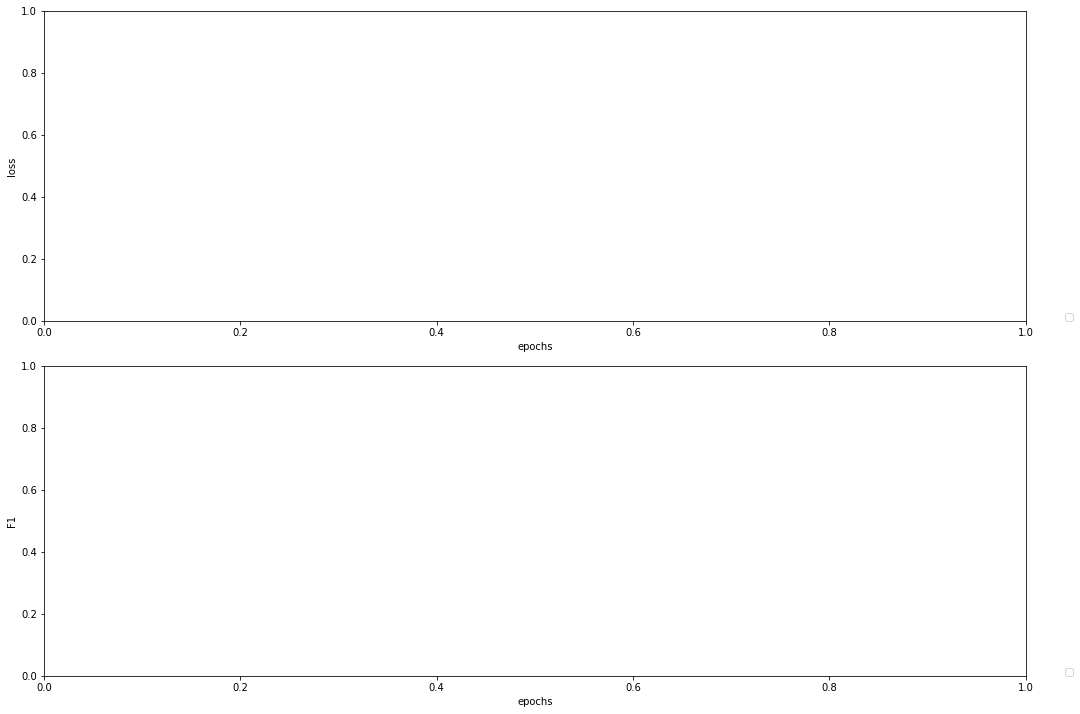

In [14]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('models/language_model/pos_lm/loss.txt')

# embed POS

In [2]:
LanguageModel.load_language_model('models/language_model/pos_lm/best-lm.pt')

LanguageModel(
  (drop): Dropout(p=0.1, inplace=False)
  (encoder): Embedding(54, 100)
  (rnn): LSTM(100, 512)
  (decoder): Linear(in_features=512, out_features=54, bias=True)
)

In [22]:
pos_lm_embeddings = FlairEmbeddings('models/language_model/pos_lm/best-lm.pt')

In [15]:
sentence = Sentence('NN VB NNS .')

pos_lm_embeddings.embed(sentence)

[Sentence: "NN VB NNS ."   [− Tokens: 4]]

In [24]:
sentence.tokens[0].embedding.shape

torch.Size([512])

In [23]:
path = './dataset/Spooky Author Identification/split/total_with_pos.csv'
df = pd.read_csv(path, delimiter=',', index_col= 0, encoding='utf-8') 
text_list = df['text'].values.tolist()
author_list = df['author'].values.tolist()

In [27]:
embeddings_list = []
for text in text_list[:200]:
    sentence = Sentence(text)
    pos_lm_embeddings.embed(sentence)
    for j,token in enumerate(sentence):
        if j == 0:
            words_embeddings = torch.reshape(token.embedding.to('cpu'), (1, 512))
        else:
            words_embeddings = torch.cat((words_embeddings, torch.reshape(token.embedding.to('cpu'), (1, 512))))
    embeddings_list.append(words_embeddings)

In [28]:
# https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python/13849249#13849249
def unit_vector(vector):
    return vector / torch.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return torch.acos(torch.clamp(torch.dot(v1_u, v2_u), -1.0, 1.0))

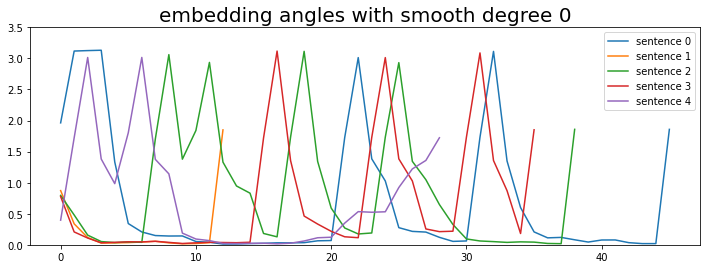

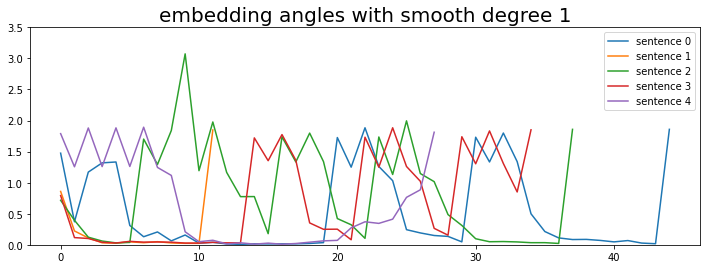

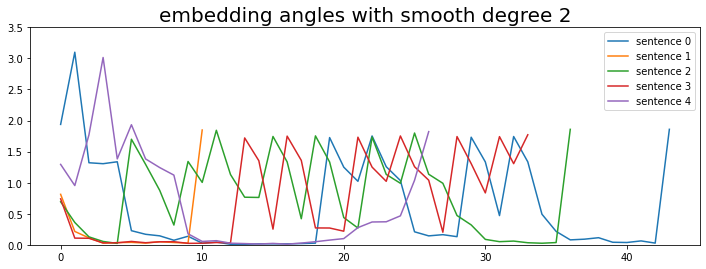

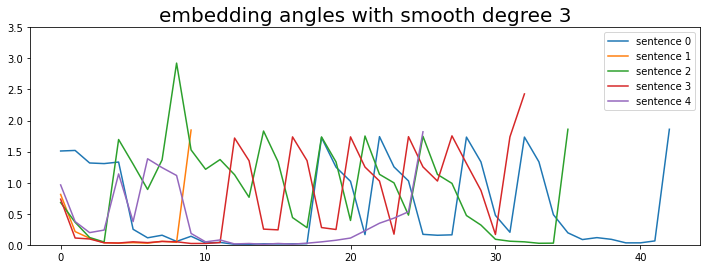

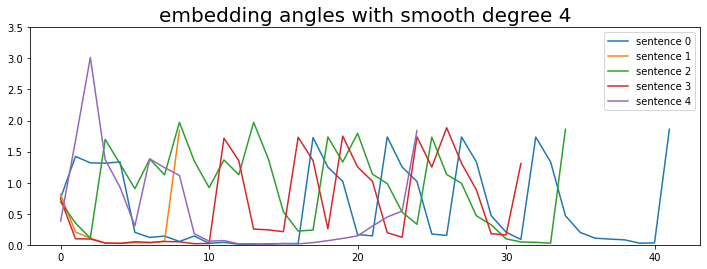

In [31]:
for smooth_degree in range(5):
    plt.figure(figsize=(12,4))
    plt.title('embedding angles with smooth degree {}'.format(smooth_degree), fontsize = 20)
    for j,words_embeddings_sample in enumerate(embeddings_list[:5]):
        averaged_embedding = torch.zeros(words_embeddings_sample.shape[0]-smooth_degree,words_embeddings_sample.shape[1])
        for i in range(words_embeddings_sample.shape[0]-smooth_degree):
            averaged_embedding[i,:] = words_embeddings_sample[i:i+1+smooth_degree,:].mean(axis = 0)

        embedding_direction = torch.zeros(averaged_embedding.shape[0]-1,averaged_embedding.shape[1])
        for i in range(averaged_embedding.shape[0]-1):
            embedding_direction[i,:] = averaged_embedding[i+1,:] - averaged_embedding[i,:]
        angle = torch.zeros(averaged_embedding.shape[0]-2)
        for i in range(averaged_embedding.shape[0]-2):
            angle[i] = angle_between(embedding_direction[i+1,:], embedding_direction[i,:])
        plt.plot(angle, label='sentence {}'.format(j))
        plt.ylim(0,3.5)
    plt.legend()

In [32]:
author_color = {'EAP':'blue', 'HPL':'green', 'MWS':'orange'}

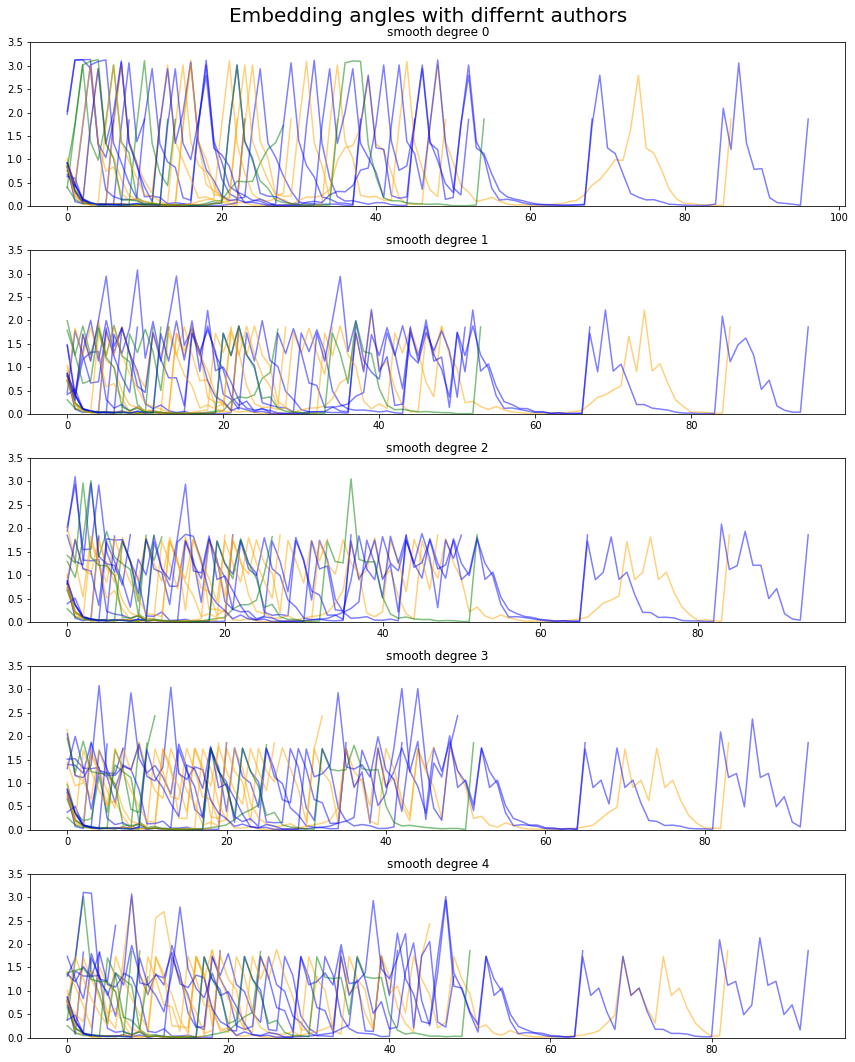

In [33]:
fig = plt.figure(figsize=(12,15))
fig.suptitle('Embedding angles with differnt authors', fontsize=20)

for smooth_degree in range(5):
    plt.subplot(5,1,smooth_degree + 1)
    plt.title('smooth degree {}'.format(smooth_degree))
    for j,words_embeddings_sample in enumerate(embeddings_list[:20]):
        color = author_color[author_list[j]]
        averaged_embedding = torch.zeros(words_embeddings_sample.shape[0]-smooth_degree,words_embeddings_sample.shape[1])
        for i in range(words_embeddings_sample.shape[0]-smooth_degree):
            averaged_embedding[i,:] = words_embeddings_sample[i:i+1+smooth_degree,:].mean(axis = 0)

        embedding_direction = torch.zeros(averaged_embedding.shape[0]-1,averaged_embedding.shape[1])
        for i in range(averaged_embedding.shape[0]-1):
            embedding_direction[i,:] = averaged_embedding[i+1,:] - averaged_embedding[i,:]
        angle = torch.zeros(averaged_embedding.shape[0]-2)
        for i in range(averaged_embedding.shape[0]-2):
            angle[i] = angle_between(embedding_direction[i+1,:], embedding_direction[i,:])
        plt.plot(angle, color = color, alpha = 0.5, label='sentence {}'.format(j))
        plt.ylim(0,3.5)
#     plt.legend()
plt.tight_layout()

In [34]:
df['author'][:20].value_counts()

EAP    9
MWS    6
HPL    5
Name: author, dtype: int64